# **모노인더스트리 공정별 분석**

- pH, 온도, 전류, 전압 순으로 시각화  
- 각 데이터의 0으로 측정된 값들은 해당 열의 평균값으로 대체함

In [1]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 루트 디렉토리 경로 설정
# 구글드라이브에 연결된 파일의 폴더 경로 들고오기
PROJECT_ROOT_DIR = '/content/drive/MyDrive/signlab/모노인더스트리_분석'

In [3]:
# 한글 폰트 설치
# 4번째 셀 실행후 런타임 재시작
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [4]:
# 필요한 모듈 임포트

# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import tensorflow as tf
import pandas as pd
import numpy as np
import os

# 진행률 표시
from tqdm.auto import tqdm

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
""
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.figsize'] = (20, 20)
fm._rebuild()

# 한글 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
#mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
mpl.rc('font', family=font_name) #윈도우, 구글 콜랩
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 그림을 저장할 위치
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 모노_pH.xlsx

In [5]:
# ph
df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, '모노_pH.xlsx'),
                   header=1,
                   index_col='수집일시'
                   ) # 몇번째 행부터 데이터를 읽을 것인지

In [6]:
# 결측값 제거
df=df.replace(0, np.nan)
df

,순번,구분,전해탈지_01,전해탈지_02,활성화,동스트라이크,은도금,주석도금_01,주석도금_02,중화,변색방지
수집일시,,,,,,,,,,,
2021-08-17 오후 1:20:34,1,공장동,11.85,19.191919,10.0,12.06,0.07,19.191919,11.61,19.191919,NaN
2021-08-17 오후 1:20:29,2,공장동,11.85,19.191919,10.0,12.06,0.07,19.191919,11.61,19.191919,NaN
2021-08-17 오후 1:20:24,3,공장동,11.85,19.191919,10.0,12.06,0.07,19.191919,11.61,19.191919,NaN
2021-08-17 오후 1:20:19,4,공장동,11.85,19.191919,10.0,12.07,0.07,19.191919,11.61,19.191919,NaN
2021-08-17 오후 1:20:14,5,공장동,11.85,19.191919,10.0,12.06,0.07,19.191919,11.62,19.191919,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13 오후 8:01:26,2182,공장동,12.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-13 오후 8:01:24,2183,공장동,12.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-13 오후 8:01:22,2184,공장동,12.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.fillna(df.mean())
df

,순번,구분,전해탈지_01,전해탈지_02,활성화,동스트라이크,은도금,주석도금_01,주석도금_02,중화,변색방지
수집일시,,,,,,,,,,,
2021-08-17 오후 1:20:34,1,공장동,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919,NaN
2021-08-17 오후 1:20:29,2,공장동,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919,NaN
2021-08-17 오후 1:20:24,3,공장동,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919,NaN
2021-08-17 오후 1:20:19,4,공장동,11.85,19.191919,10.000000,12.070000,0.070000,19.191919,11.610000,19.191919,NaN
2021-08-17 오후 1:20:14,5,공장동,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.620000,19.191919,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13 오후 8:01:26,2182,공장동,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038,NaN
2021-08-13 오후 8:01:24,2183,공장동,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038,NaN
2021-08-13 오후 8:01:22,2184,공장동,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038,NaN


In [8]:
ph_df_col = ['전해탈지_01', '전해탈지_02', '활성화', '동스트라이크', '은도금', '주석도금_01', '주석도금_02', '중화']
ph_df = df[ph_df_col]
ph_df

,전해탈지_01,전해탈지_02,활성화,동스트라이크,은도금,주석도금_01,주석도금_02,중화
수집일시,,,,,,,,
2021-08-17 오후 1:20:34,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919
2021-08-17 오후 1:20:29,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919
2021-08-17 오후 1:20:24,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.610000,19.191919
2021-08-17 오후 1:20:19,11.85,19.191919,10.000000,12.070000,0.070000,19.191919,11.610000,19.191919
2021-08-17 오후 1:20:14,11.85,19.191919,10.000000,12.060000,0.070000,19.191919,11.620000,19.191919
...,...,...,...,...,...,...,...,...
2021-08-13 오후 8:01:26,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038
2021-08-13 오후 8:01:24,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038
2021-08-13 오후 8:01:22,12.11,18.492622,9.554918,11.684007,0.096858,18.553430,11.287705,17.797038


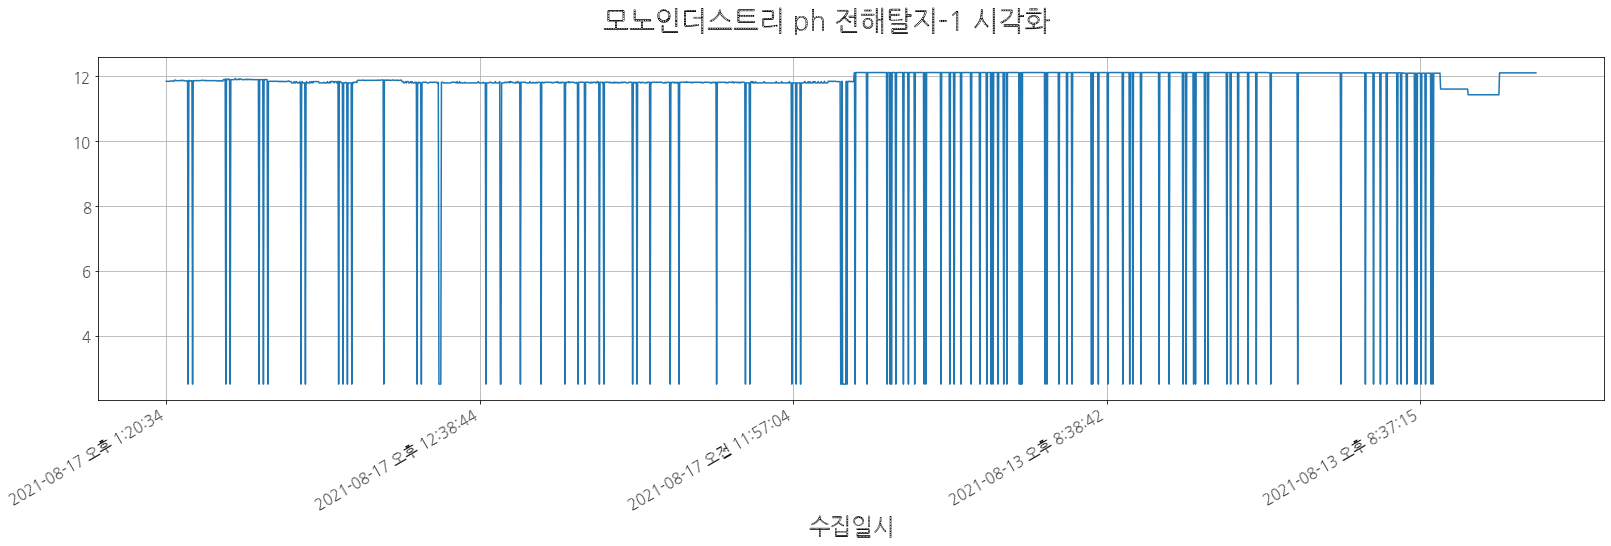

In [9]:
ph_df['전해탈지_01'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=15,
           title='모노인더스트리 ph 전해탈지-1 시각화')
plt.show()

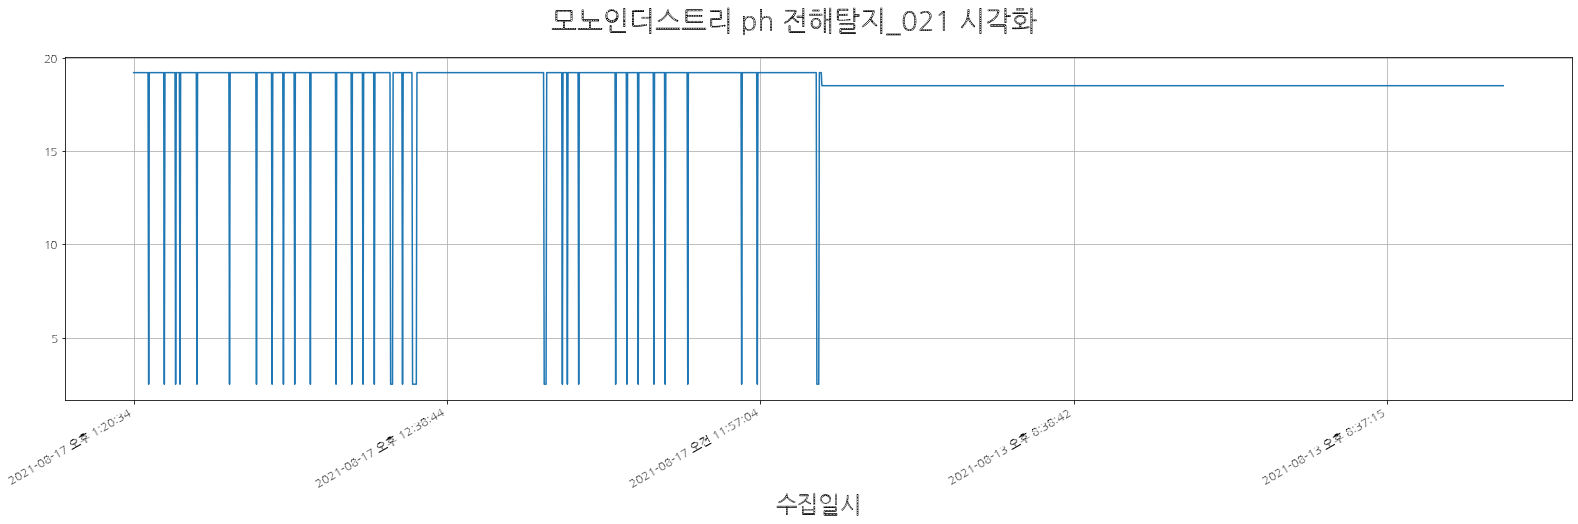

In [10]:
ph_df['전해탈지_02'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 전해탈지_021 시각화')
plt.show()

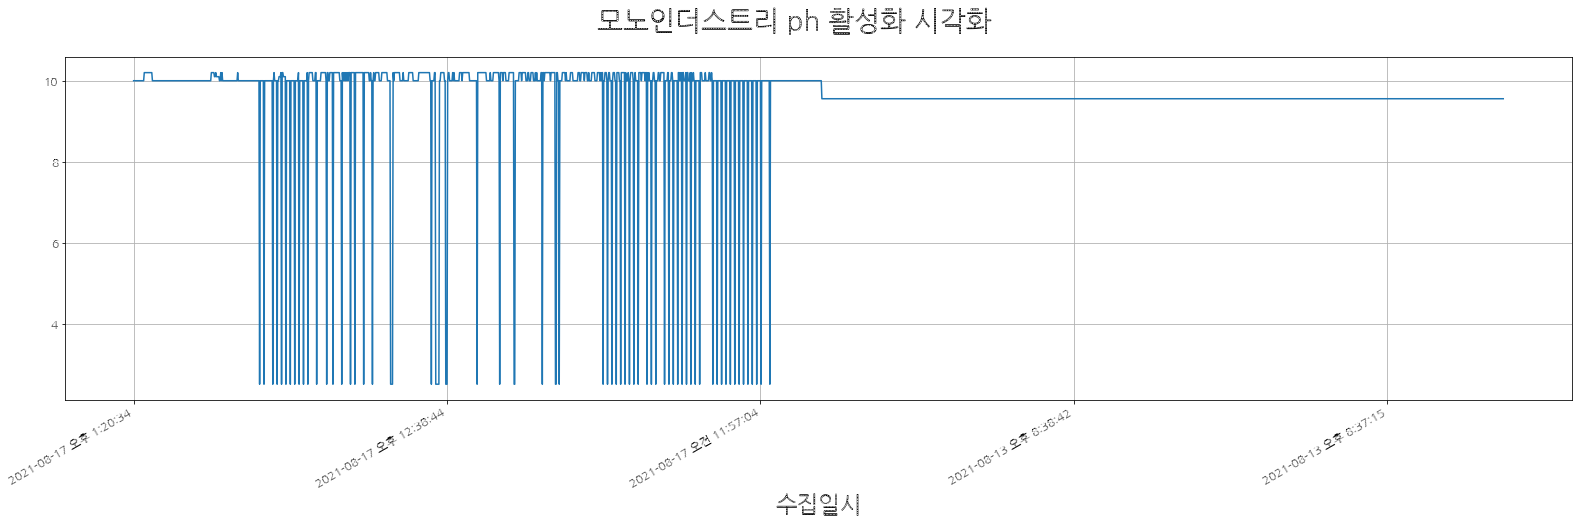

In [11]:
ph_df['활성화'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 활성화 시각화')
plt.show()

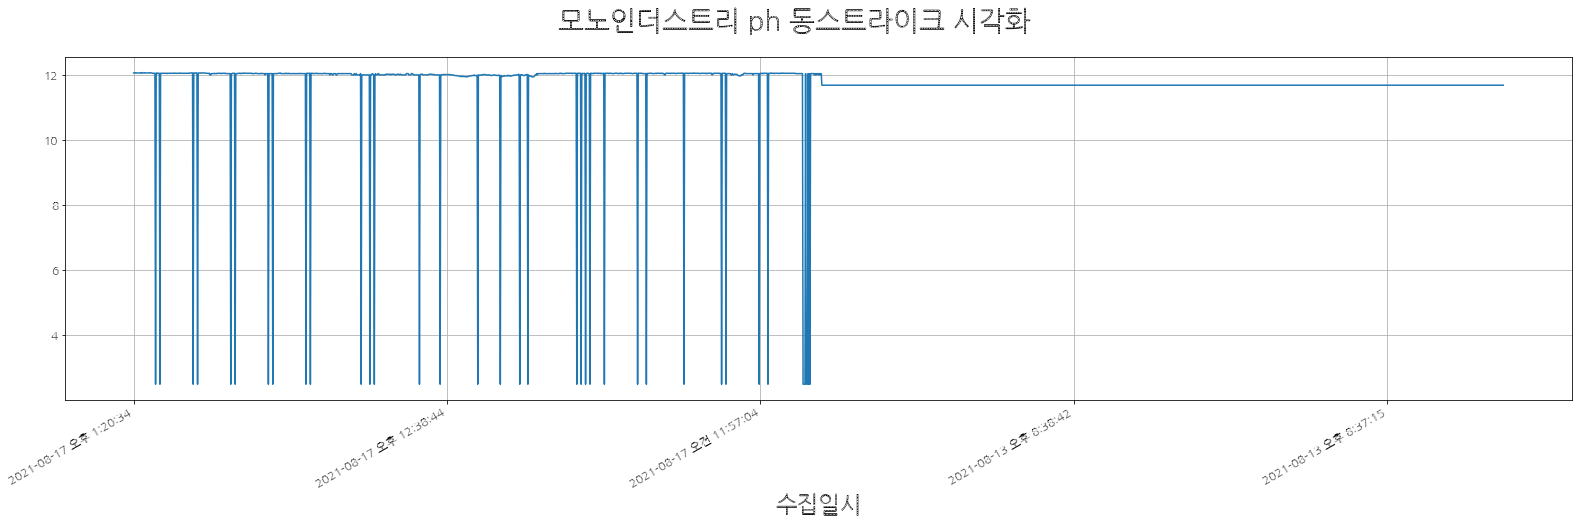

In [12]:
ph_df['동스트라이크'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 동스트라이크 시각화')
plt.show()

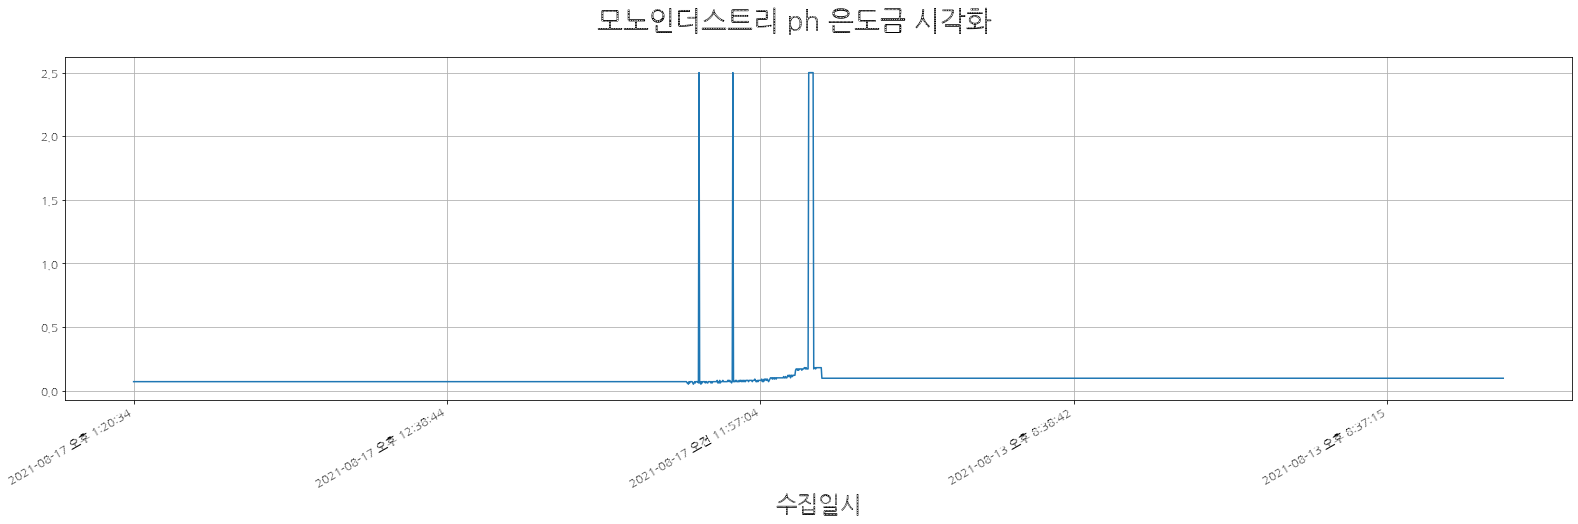

In [13]:
ph_df['은도금'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 은도금 시각화')
plt.show()

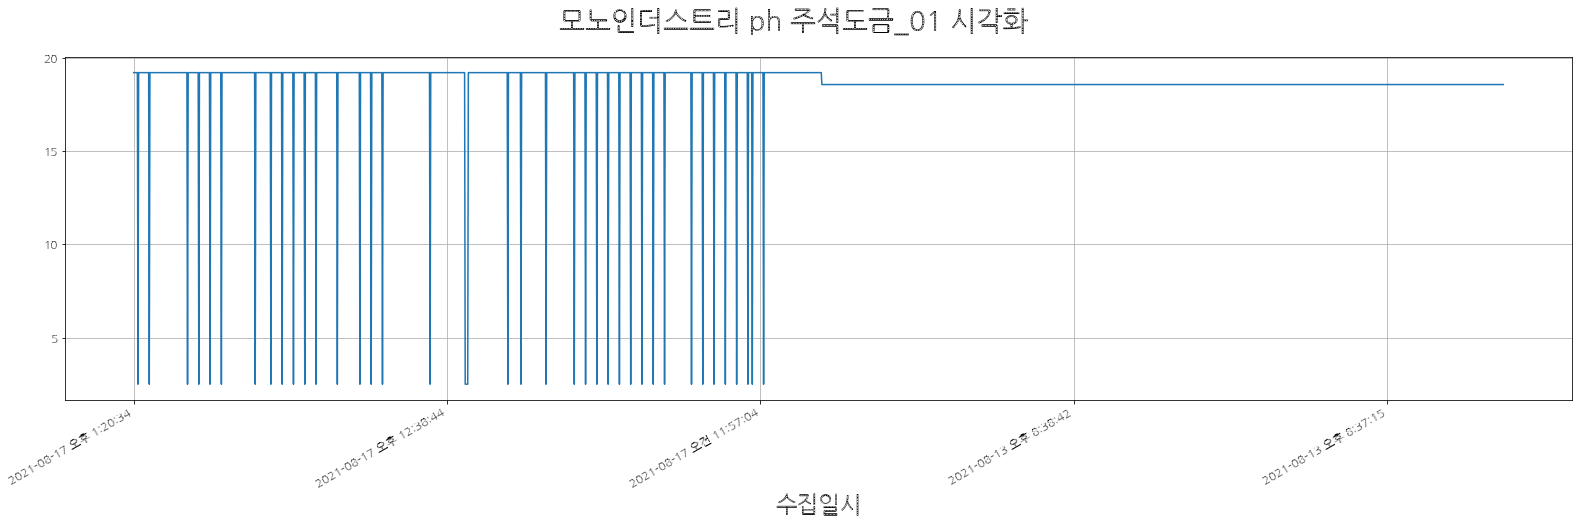

In [14]:
ph_df['주석도금_01'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 주석도금_01 시각화')
plt.show()

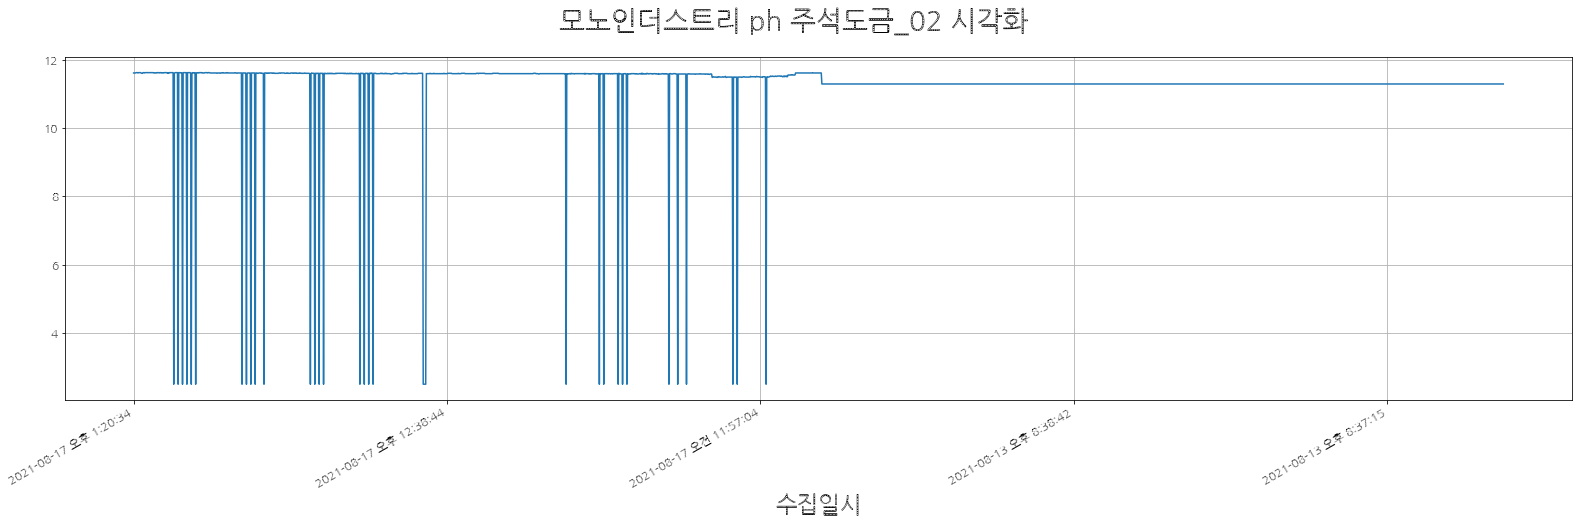

In [15]:
ph_df['주석도금_02'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 주석도금_02 시각화')
plt.show()

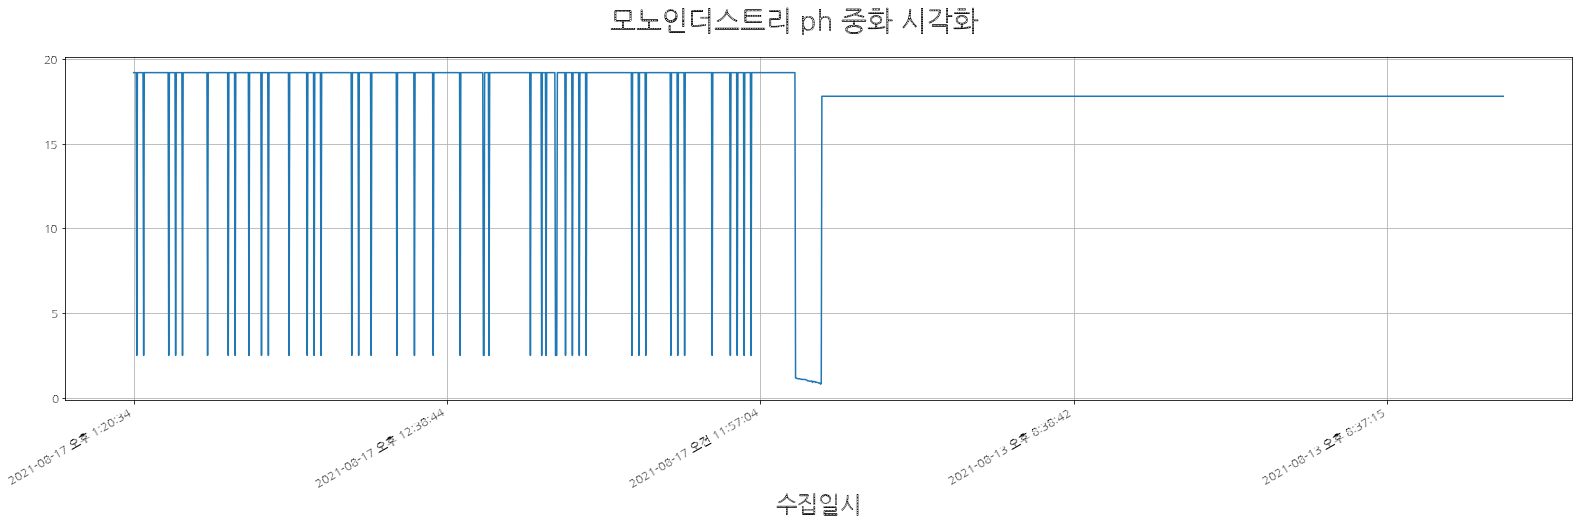

In [16]:
ph_df['중화'].plot(subplots=True, grid=True, 
           figsize=(27, 7), fontsize=12,
           title='모노인더스트리 ph 중화 시각화')
plt.show()

### ph데이터 통계

In [17]:
ph_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전해탈지_01,2186.0,11.433778,2.140964,2.50,11.800000,11.870000,12.120000,12.120000
전해탈지_02,2186.0,18.492622,2.370643,2.50,18.492622,18.492622,19.191919,19.191919
활성화,2186.0,9.554918,1.355700,2.50,9.554918,9.554918,10.000000,10.200000
동스트라이크,2186.0,11.684007,1.266019,2.50,11.684007,11.684007,12.040000,12.070000
은도금,2186.0,0.096858,0.163879,0.05,0.070000,0.096858,0.096858,2.500000
주석도금_01,2186.0,18.553430,2.269530,2.50,18.553430,18.553430,19.191919,19.191919
주석도금_02,2186.0,11.287705,1.147178,2.50,11.287705,11.287705,11.590000,11.620000
중화,2186.0,17.797038,3.353267,0.80,17.797038,17.797038,19.191919,19.191919


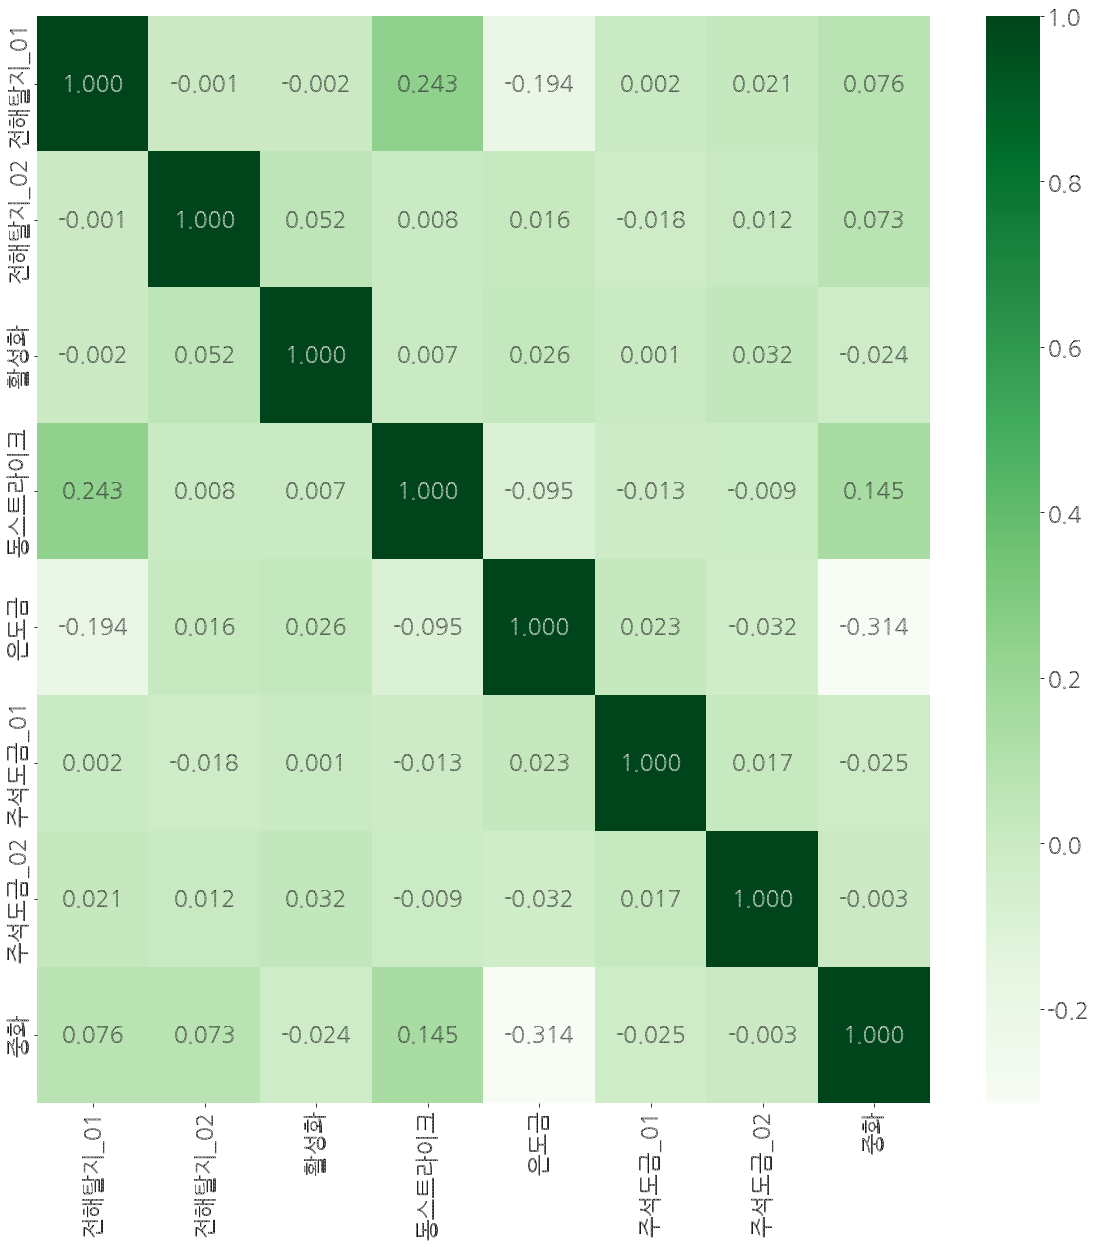

In [18]:
sns.heatmap(data = ph_df.corr(), annot=True, fmt = '.3f', linewidths=0, cmap='Greens')

## 각 공정데이터의 PH 값 시각화


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

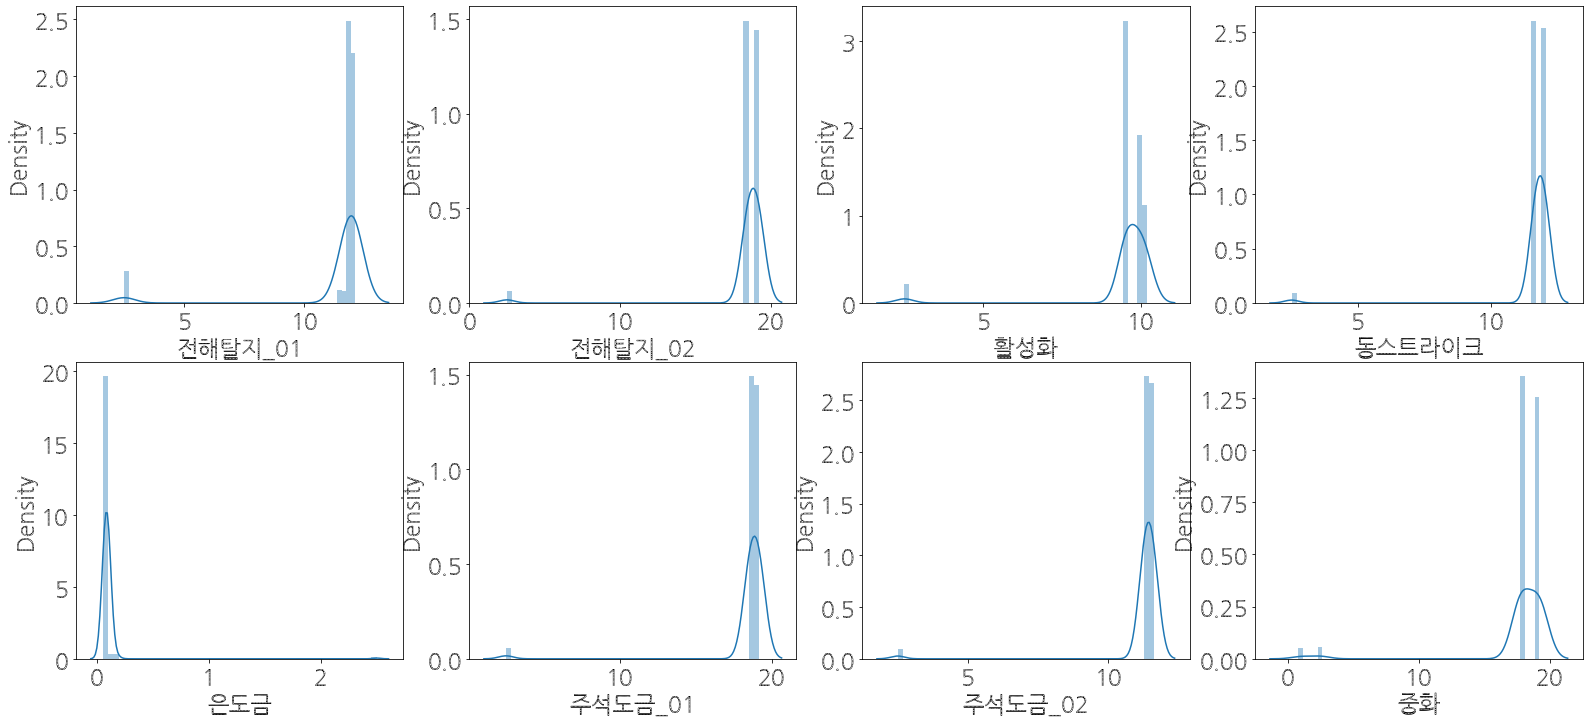

In [19]:
# 시각화 여러개 나오게 하기
figure, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2,4)
figure.set_size_inches(27,12)
sns.distplot(ph_df['전해탈지_01'], ax=ax1)
sns.distplot(ph_df['전해탈지_02'], ax=ax2)
sns.distplot(ph_df['활성화'], ax=ax3)
sns.distplot(ph_df['동스트라이크'], ax=ax4)
sns.distplot(ph_df['은도금'], ax=ax5)
sns.distplot(ph_df['주석도금_01'], ax=ax6)
sns.distplot(ph_df['주석도금_02'], ax=ax7)
sns.distplot(ph_df['중화'], ax=ax8)

## **모노_온도.xlsx**

- 주석도금-2 데이터가 없음


In [20]:
# 온도
temp_df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, '모노_온도.xlsx'),
                   header=2,
                   index_col='측정시간'
                   ) # 몇번째 행부터 데이터를 읽을 것인지

In [21]:
# 0값을 결측값으로 변경
temp_df=temp_df.replace(0, np.nan)
temp_df

,IDX,전해탈지-1,전해탈지-2,활성화,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2,중화,탕세
측정시간,,,,,,,,,,,,
2021-06-24 오후 7:00:10,1,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,NaN,51.8,45.2
2021-06-24 오후 7:00:16,2,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:22,3,46.2,44.9,24.2,40.4,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:28,4,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:34,5,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.8,NaN,52.0,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 오후 9:53:46,5862,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0
2021-06-30 오후 9:53:49,5863,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0
2021-06-30 오후 9:53:52,5864,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0


In [22]:
# 결측값을 평균으로 채우기
temp_df=temp_df.fillna(temp_df.mean())
temp_df

,IDX,전해탈지-1,전해탈지-2,활성화,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2,중화,탕세
측정시간,,,,,,,,,,,,
2021-06-24 오후 7:00:10,1,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,NaN,51.8,45.2
2021-06-24 오후 7:00:16,2,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:22,3,46.2,44.9,24.2,40.4,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:28,4,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.7,NaN,52.0,45.3
2021-06-24 오후 7:00:34,5,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.8,NaN,52.0,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 오후 9:53:46,5862,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0
2021-06-30 오후 9:53:49,5863,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0
2021-06-30 오후 9:53:52,5864,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,NaN,54.1,56.0


In [23]:
c_df_col = ['전해탈지-1','전해탈지-2', '활성화','동도금','은스트라이크','은도금','크로메이트','주석도금-1', '중화','탕세']
c_df = temp_df[c_df_col]
c_df

,전해탈지-1,전해탈지-2,활성화,동도금,은스트라이크,은도금,크로메이트,주석도금-1,중화,탕세
측정시간,,,,,,,,,,
2021-06-24 오후 7:00:10,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,51.8,45.2
2021-06-24 오후 7:00:16,46.2,44.9,24.2,40.5,26.4,19.5,24.0,15.7,52.0,45.3
2021-06-24 오후 7:00:22,46.2,44.9,24.2,40.4,26.4,19.5,24.0,15.7,52.0,45.3
2021-06-24 오후 7:00:28,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.7,52.0,45.3
2021-06-24 오후 7:00:34,46.2,45.0,24.2,40.4,26.4,19.5,24.0,15.8,52.0,45.3
...,...,...,...,...,...,...,...,...,...,...
2021-06-30 오후 9:53:46,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,54.1,56.0
2021-06-30 오후 9:53:49,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,54.1,56.0
2021-06-30 오후 9:53:52,45.8,44.5,24.6,39.7,27.0,15.0,25.1,14.2,54.1,56.0


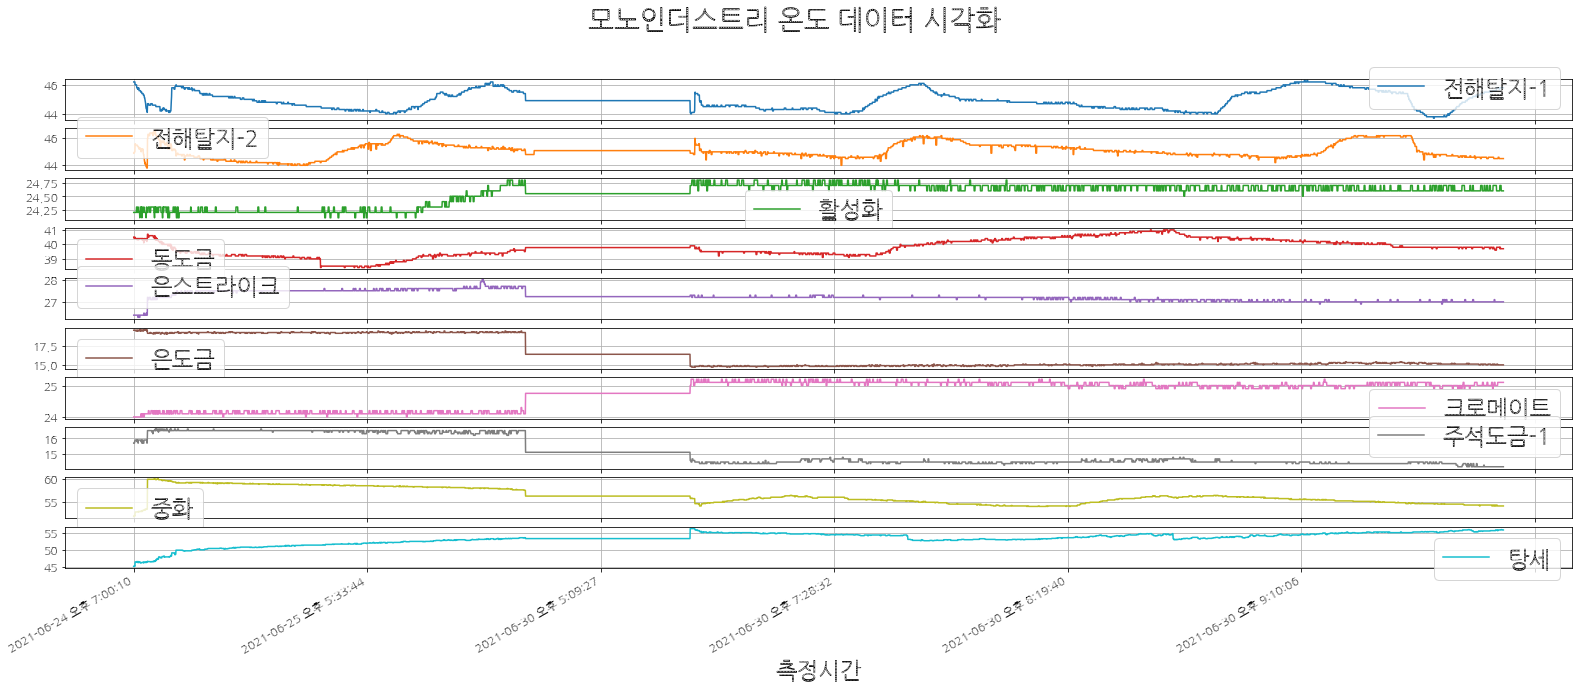

In [24]:
c_df.plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 데이터 시각화')
plt.show()

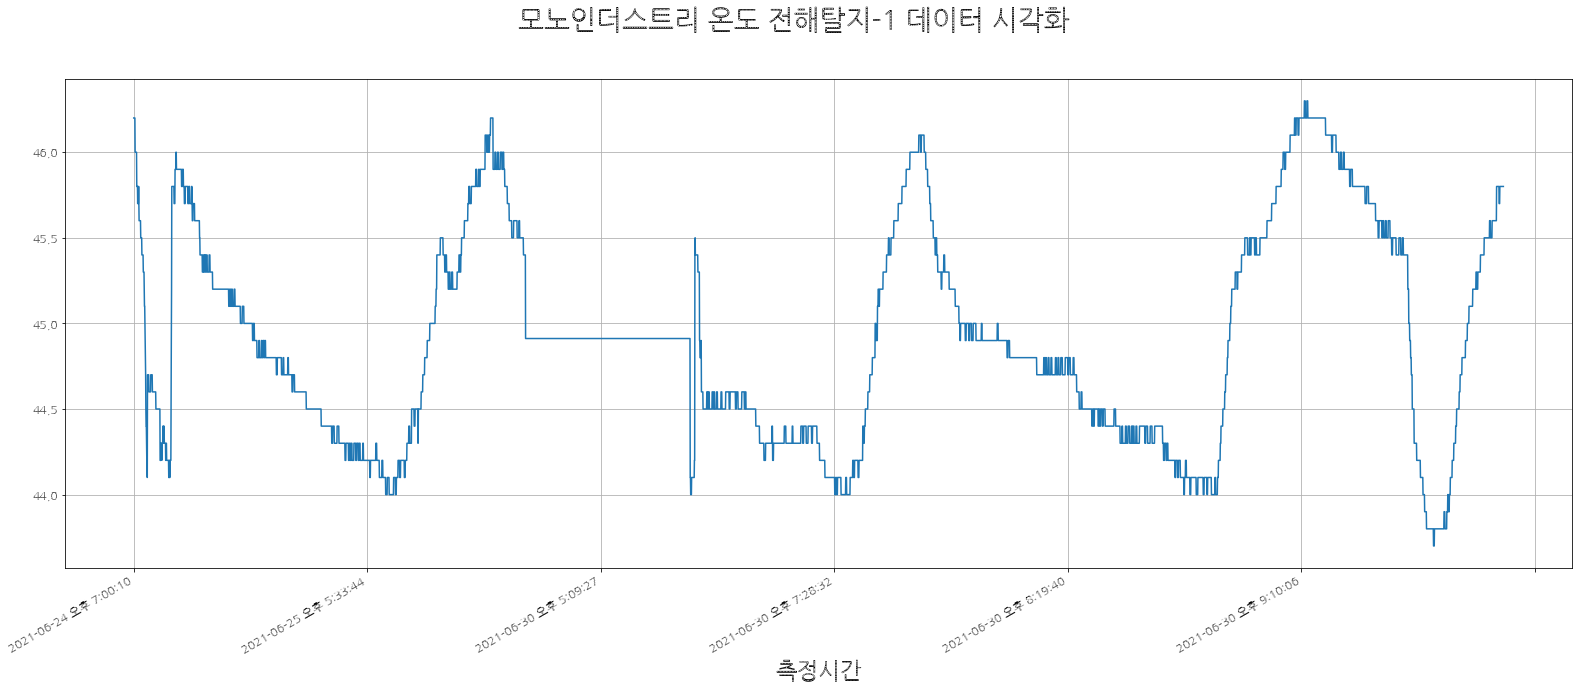

In [25]:
c_df['전해탈지-1'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 전해탈지-1 데이터 시각화')
plt.show()

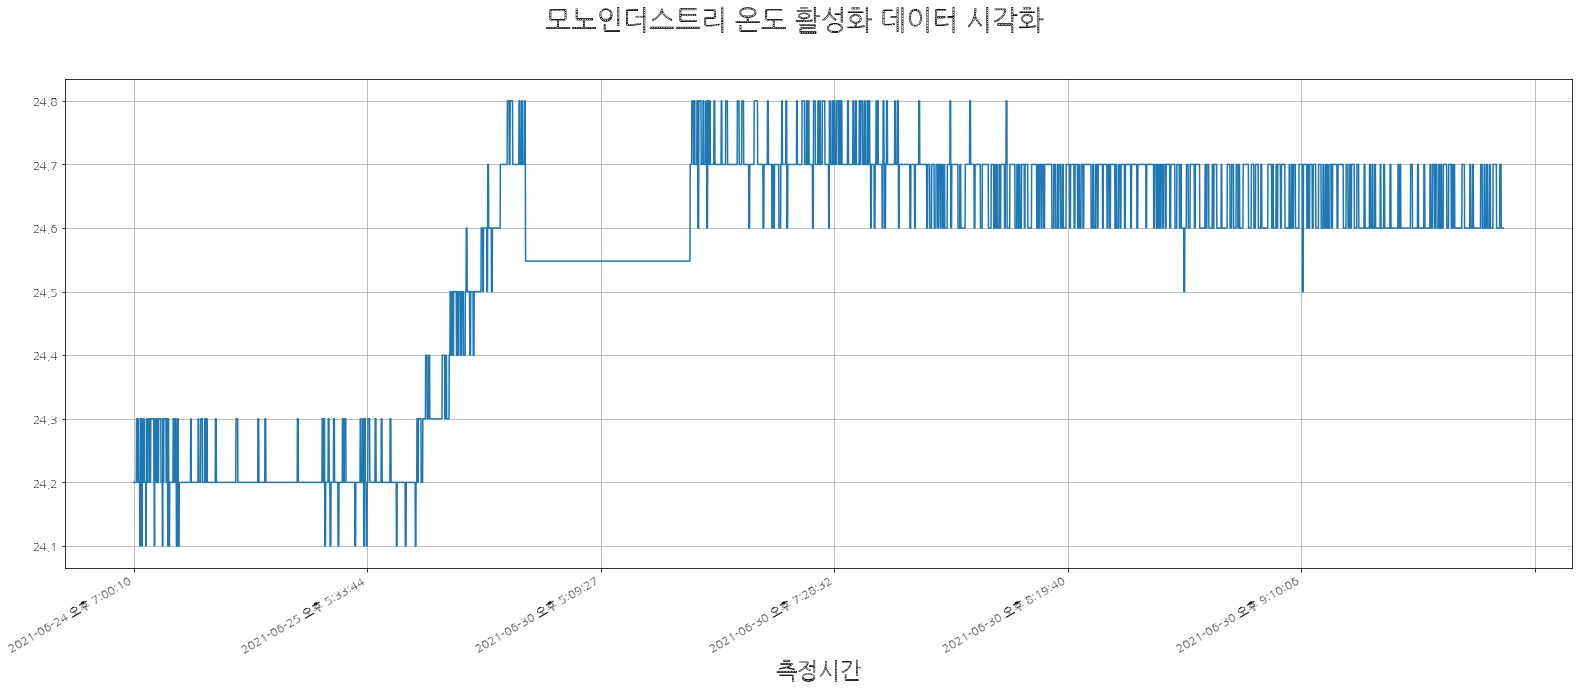

In [26]:
c_df['활성화'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 활성화 데이터 시각화')
plt.show()

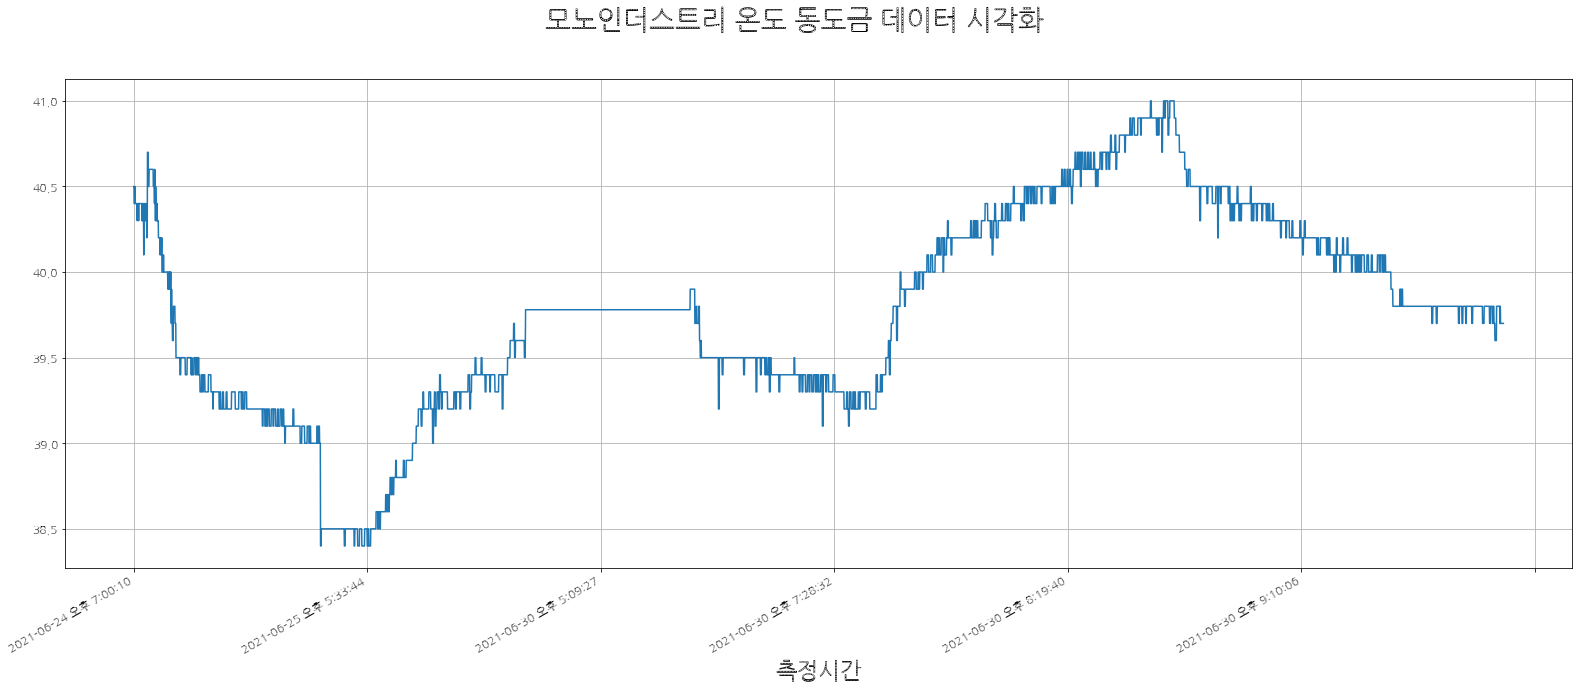

In [27]:
c_df['동도금'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 동도금 데이터 시각화')
plt.show()

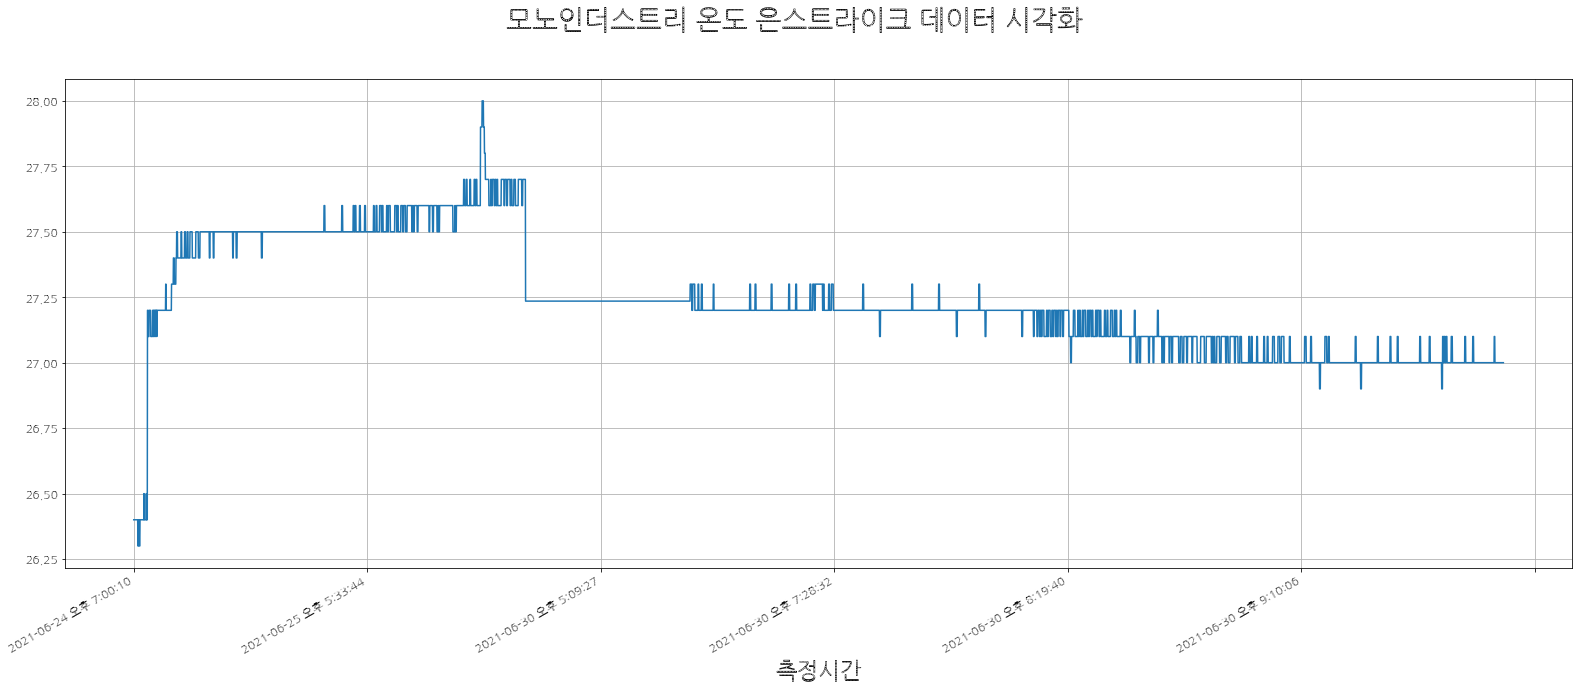

In [28]:
c_df['은스트라이크'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 은스트라이크 데이터 시각화')
plt.show()

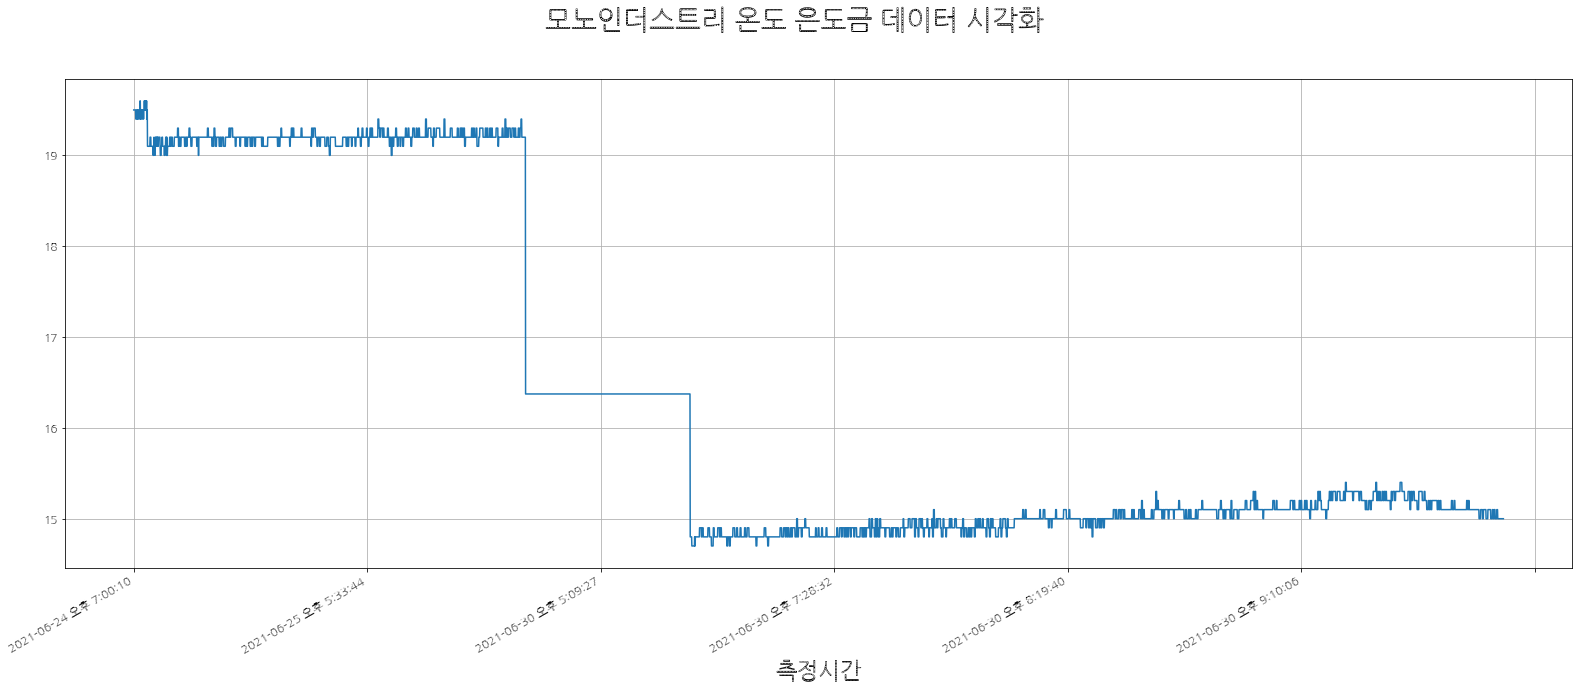

In [29]:
c_df['은도금'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 은도금 데이터 시각화')
plt.show()

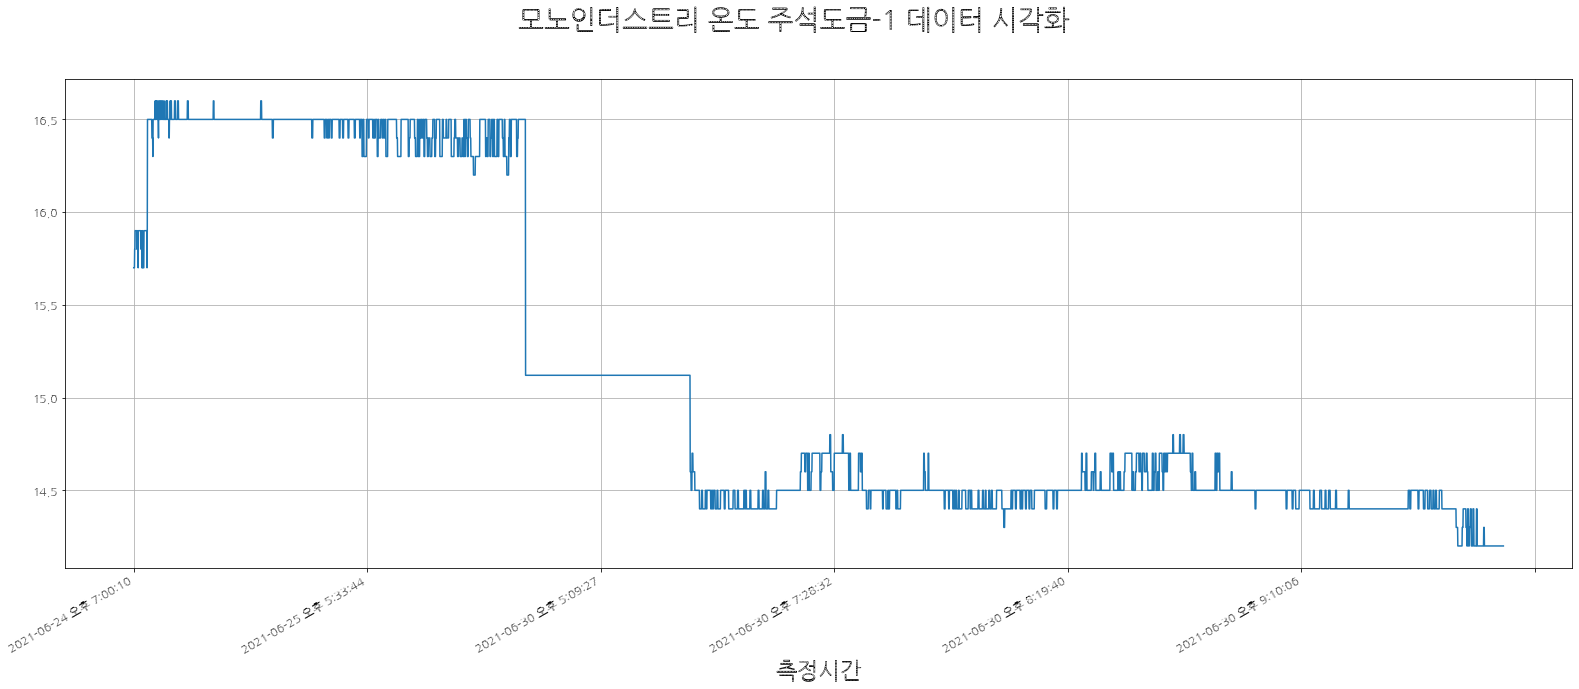

In [30]:
c_df['주석도금-1'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 주석도금-1 데이터 시각화')
plt.show()

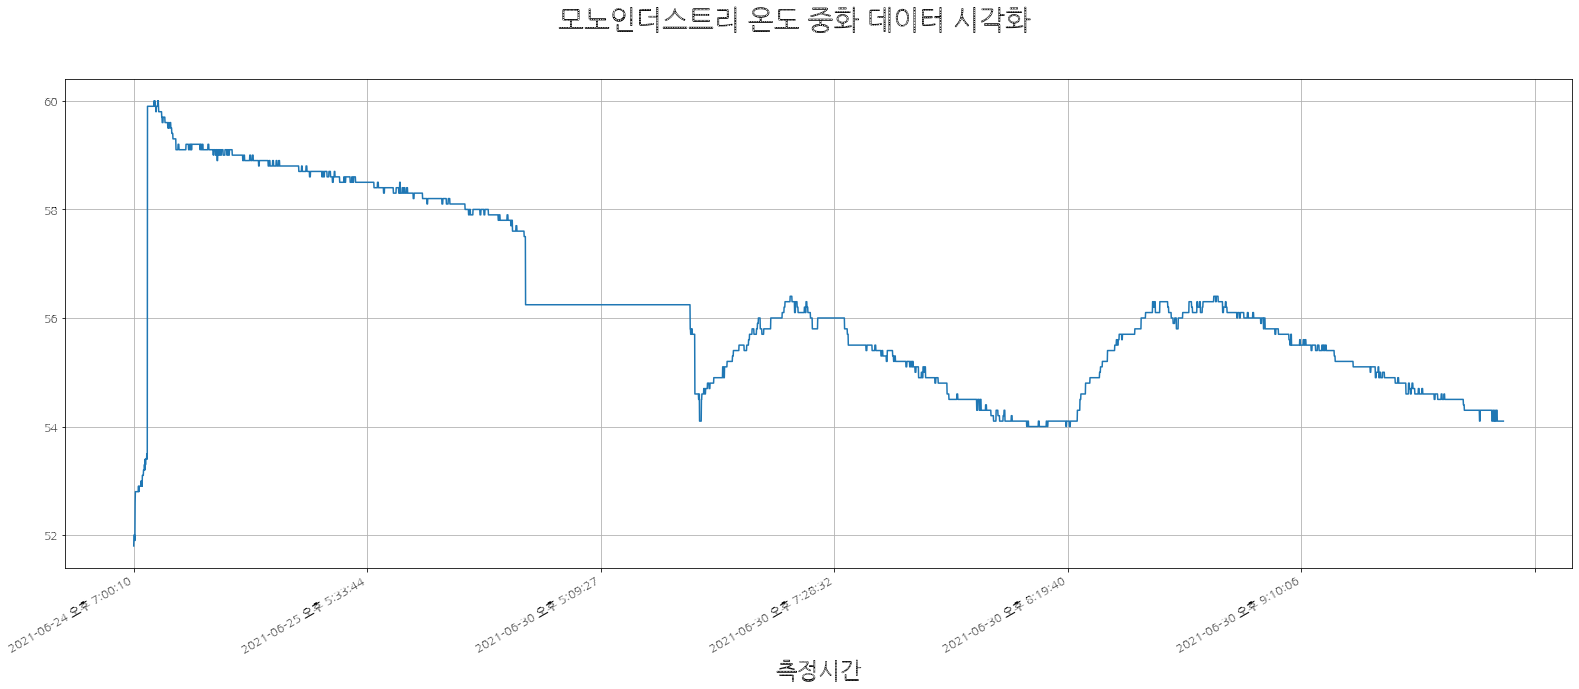

In [31]:
c_df['중화'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 중화 데이터 시각화')
plt.show()

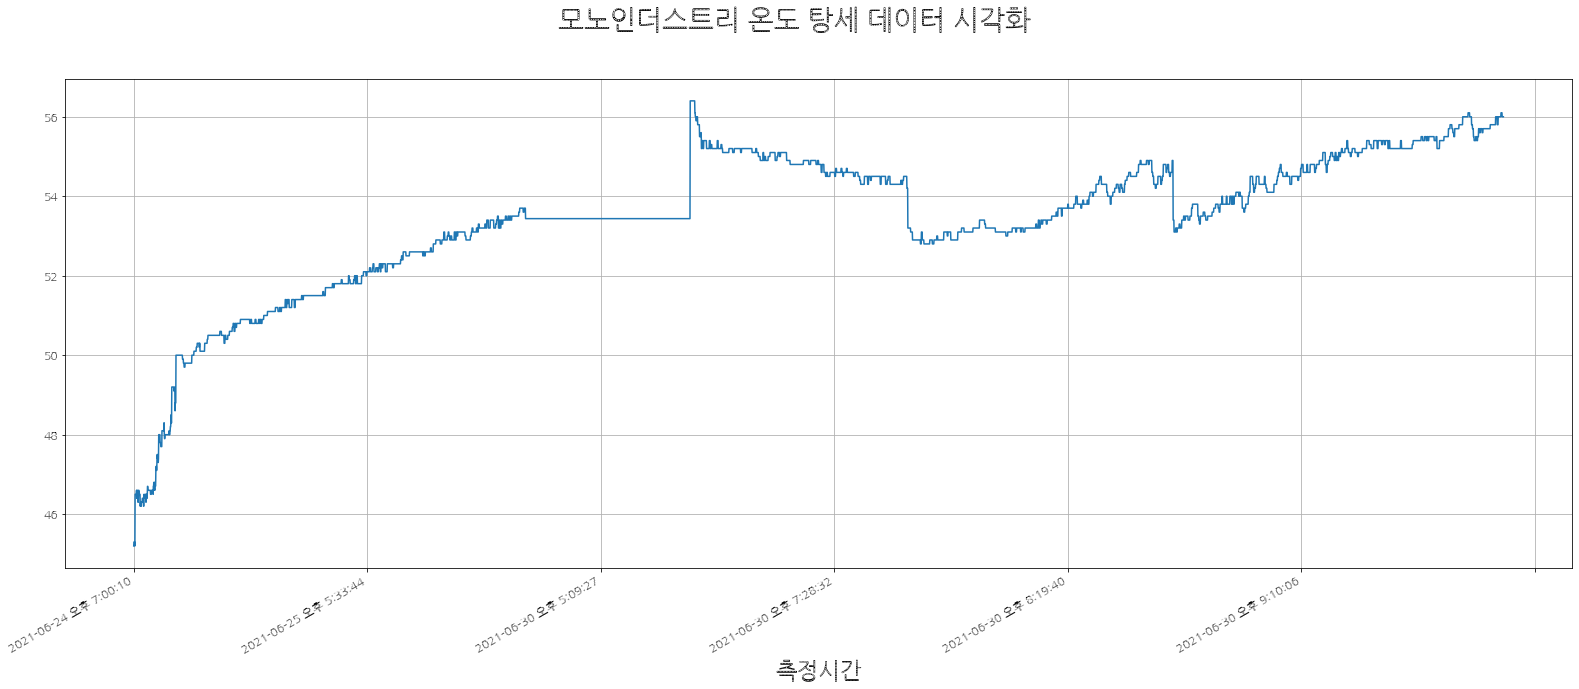

In [32]:
c_df['탕세'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 온도 탕세 데이터 시각화')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

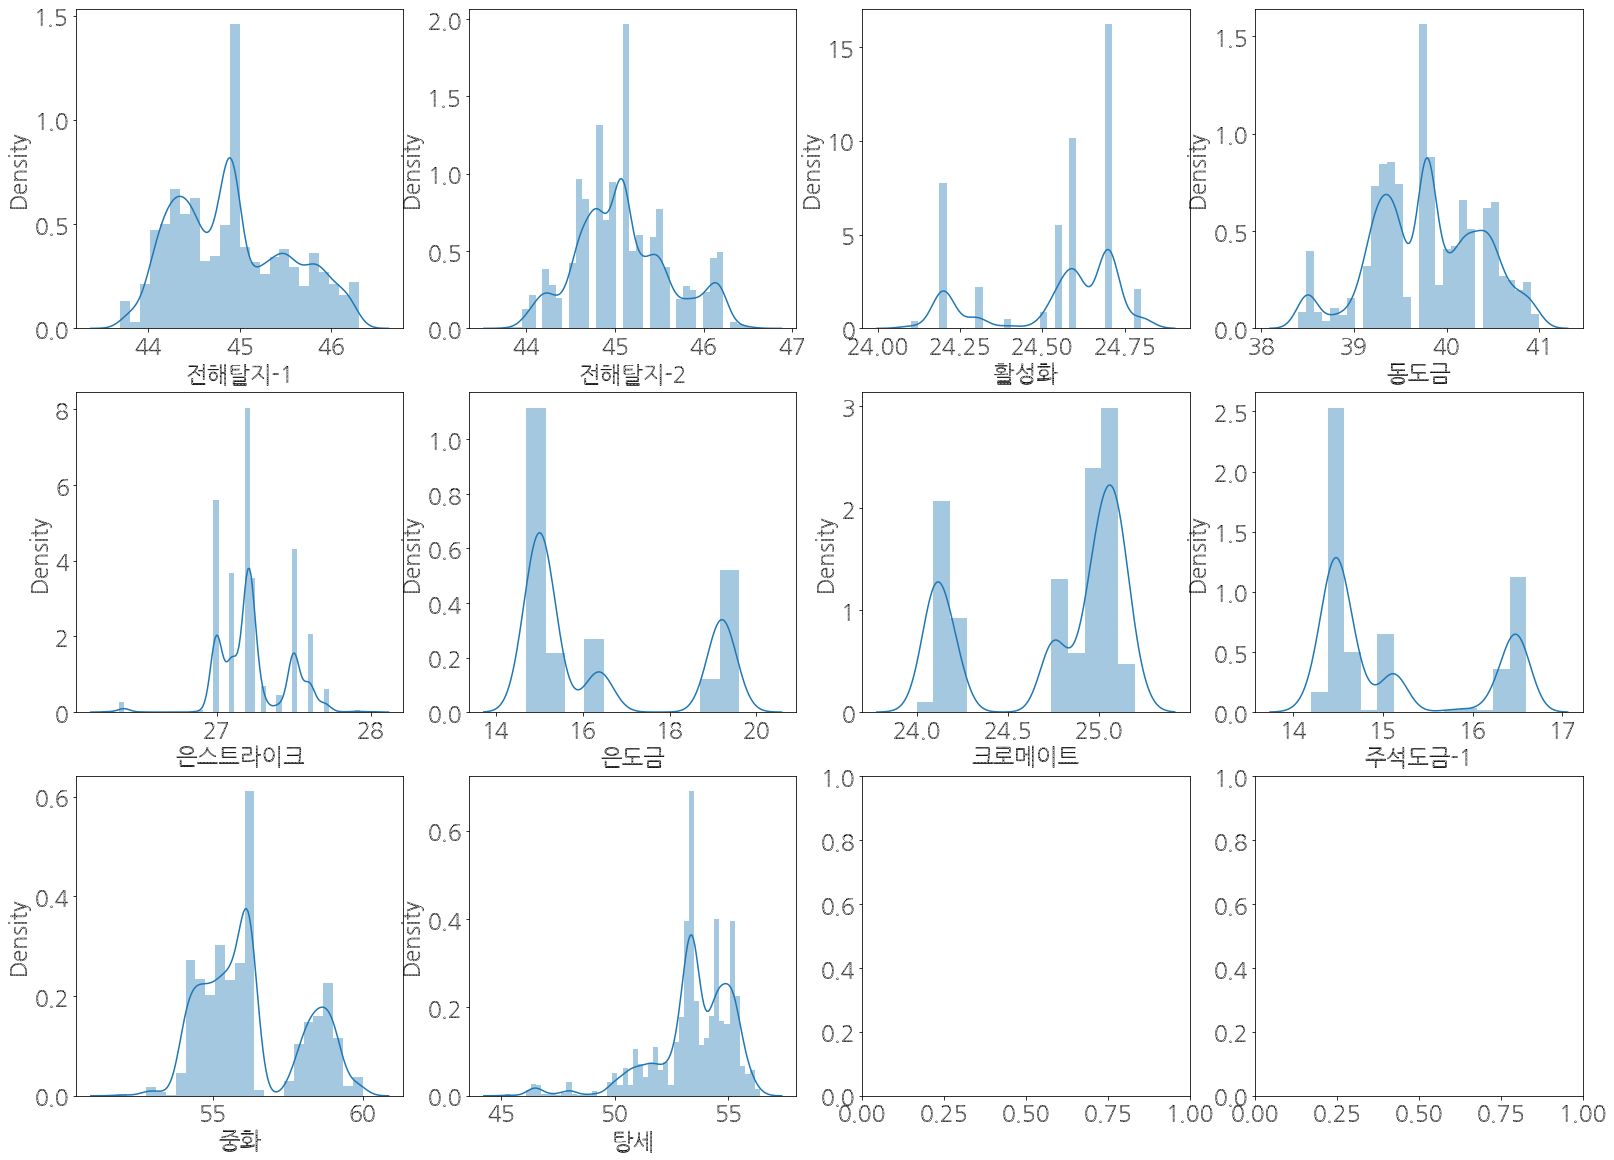

In [33]:
# 시각화 여러개 나오게 하기
figure, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8),(ax9, ax10, ax11, ax12)) = plt.subplots(3,4)
figure.set_size_inches(27,20)
sns.distplot(c_df['전해탈지-1'], ax=ax1)
sns.distplot(c_df['전해탈지-2'], ax=ax2)
sns.distplot(c_df['활성화'], ax=ax3)
sns.distplot(c_df['동도금'], ax=ax4)
sns.distplot(c_df['은스트라이크'], ax=ax5)
sns.distplot(c_df['은도금'], ax=ax6)
sns.distplot(c_df['크로메이트'], ax=ax7)
sns.distplot(c_df['주석도금-1'], ax=ax8)
sns.distplot(c_df['중화'], ax=ax9)
sns.distplot(c_df['탕세'], ax=ax10)

In [34]:
c_df[c_df_col].describe()

,전해탈지-1,전해탈지-2,활성화,동도금,은스트라이크,은도금,크로메이트,주석도금-1,중화,탕세
count,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.00000,5866.000000,5866.000000,5866.000000,5866.000000
mean,44.911742,45.091227,24.547995,39.779926,27.235168,16.37328,24.751269,15.120267,56.244022,53.436601
std,0.610752,0.529527,0.192981,0.580957,0.216154,1.84972,0.411695,0.867557,1.634708,1.781303
min,43.700000,43.800000,24.100000,38.400000,26.300000,14.70000,24.000000,14.200000,51.800000,45.200000
25%,44.400000,44.700000,24.500000,39.400000,27.100000,15.00000,24.200000,14.500000,54.900000,52.900000
50%,44.900000,45.091227,24.600000,39.779926,27.200000,15.20000,25.000000,14.600000,56.000000,53.436601
75%,45.400000,45.400000,24.700000,40.200000,27.400000,19.10000,25.100000,16.300000,57.900000,54.800000
max,46.300000,46.600000,24.800000,41.000000,28.000000,19.60000,25.200000,16.600000,60.000000,56.400000


### 모노 온도 데이터 통계 및 상관관계 히트맵

In [35]:
c_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전해탈지-1,5866.0,44.911742,0.610752,43.7,44.4,44.900000,45.4,46.3
전해탈지-2,5866.0,45.091227,0.529527,43.8,44.7,45.091227,45.4,46.6
활성화,5866.0,24.547995,0.192981,24.1,24.5,24.600000,24.7,24.8
동도금,5866.0,39.779926,0.580957,38.4,39.4,39.779926,40.2,41.0
은스트라이크,5866.0,27.235168,0.216154,26.3,27.1,27.200000,27.4,28.0
은도금,5866.0,16.373280,1.849720,14.7,15.0,15.200000,19.1,19.6
크로메이트,5866.0,24.751269,0.411695,24.0,24.2,25.000000,25.1,25.2
주석도금-1,5866.0,15.120267,0.867557,14.2,14.5,14.600000,16.3,16.6
중화,5866.0,56.244022,1.634708,51.8,54.9,56.000000,57.9,60.0
탕세,5866.0,53.436601,1.781303,45.2,52.9,53.436601,54.8,56.4


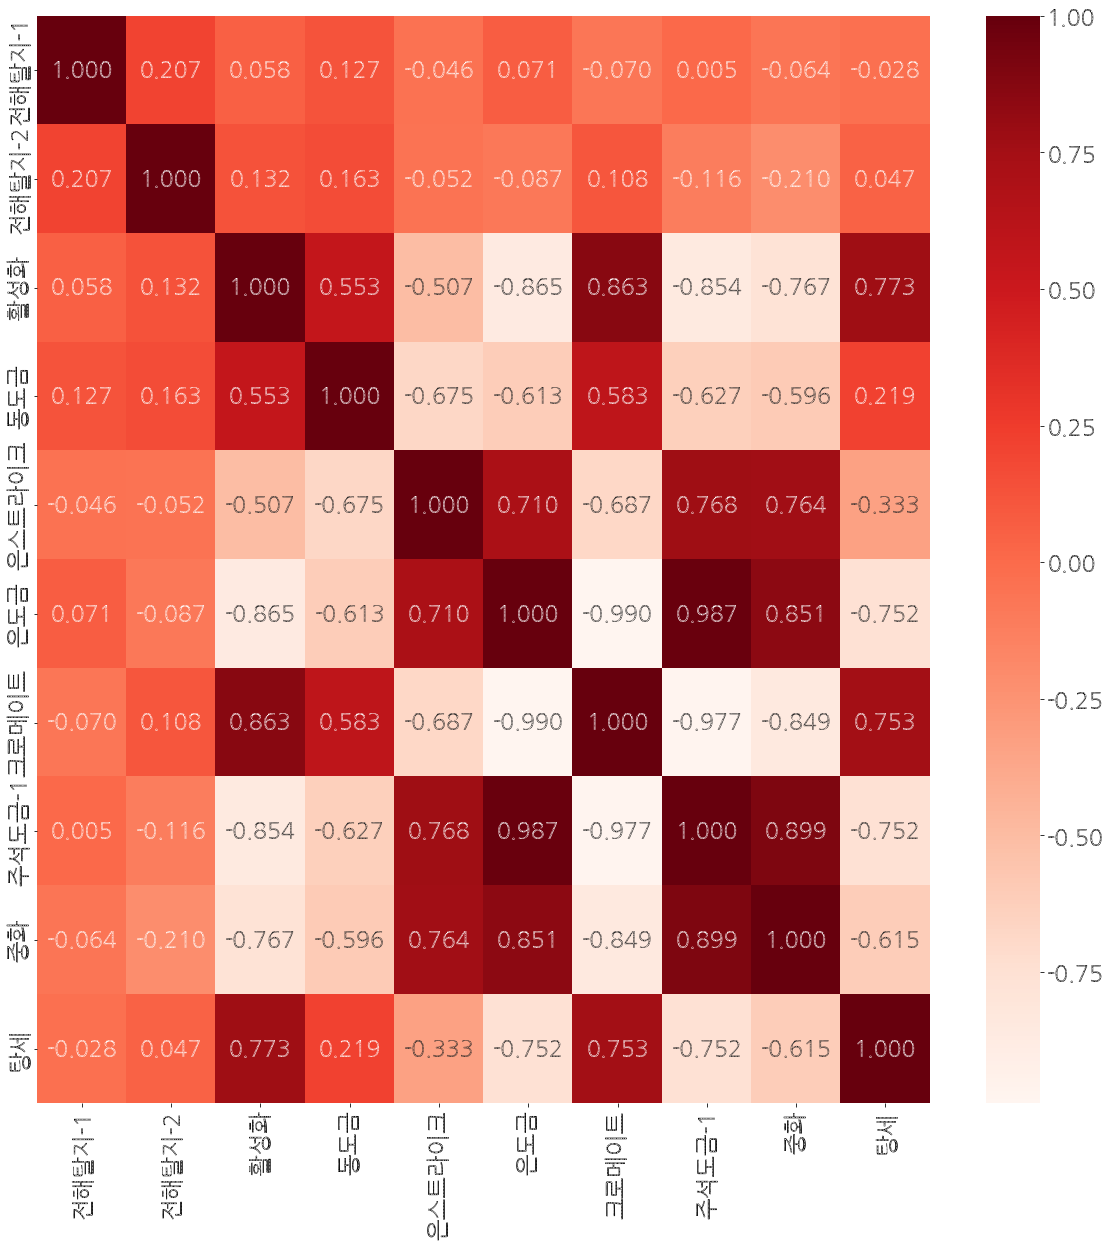

In [36]:
sns.heatmap(data = c_df.corr(), annot=True, fmt = '.3f', linewidths=0, cmap='Reds')

### 모노_전류.xlsx

- 은스트라이크 데이터 없음

In [37]:
# 전류
e_df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, '모노_전류.xlsx'),
                   header=2,
                   index_col='측정시간'
                   ) # 몇번째 행부터 데이터를 읽을 것인지

In [38]:
# 0값 결측으로 변경
e_df=e_df.replace(0,np.nan)
e_df

,IDX,전해탈지-1,전해탈지-2,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2
측정시간,,,,,,,,,
2021-06-24 오후 6:59:32,1,NaN,3000.0,NaN,NaN,16.1,23.9,-0.1,NaN
2021-06-24 오후 6:59:38,2,NaN,3000.0,NaN,NaN,16.2,23.9,-0.1,0.1
2021-06-24 오후 6:59:44,3,NaN,3000.0,NaN,NaN,16.2,23.9,-0.1,NaN
2021-06-24 오후 6:59:50,4,NaN,3000.0,NaN,NaN,16.2,24.0,-0.1,NaN
2021-06-24 오후 6:59:56,5,NaN,3000.0,NaN,NaN,16.1,23.9,-0.1,0.1
...,...,...,...,...,...,...,...,...,...
2021-08-20 오전 9:59:45,395344,NaN,3000.0,0.4,NaN,12.8,43.6,-0.1,0.1
2021-08-20 오전 9:59:48,395345,NaN,3000.0,0.4,NaN,12.8,43.6,-0.1,0.1
2021-08-20 오전 9:59:51,395346,NaN,3000.0,0.4,NaN,12.8,43.5,-0.1,0.1


In [39]:
# 결측값 평균으로 채우기
e_df = e_df.fillna(e_df.mean())
e_df

,IDX,전해탈지-1,전해탈지-2,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2
측정시간,,,,,,,,,
2021-06-24 오후 6:59:32,1,76.770662,3000.0,0.693071,NaN,16.1,23.9,-0.1,0.04805
2021-06-24 오후 6:59:38,2,76.770662,3000.0,0.693071,NaN,16.2,23.9,-0.1,0.10000
2021-06-24 오후 6:59:44,3,76.770662,3000.0,0.693071,NaN,16.2,23.9,-0.1,0.04805
2021-06-24 오후 6:59:50,4,76.770662,3000.0,0.693071,NaN,16.2,24.0,-0.1,0.04805
2021-06-24 오후 6:59:56,5,76.770662,3000.0,0.693071,NaN,16.1,23.9,-0.1,0.10000
...,...,...,...,...,...,...,...,...,...
2021-08-20 오전 9:59:45,395344,76.770662,3000.0,0.400000,NaN,12.8,43.6,-0.1,0.10000
2021-08-20 오전 9:59:48,395345,76.770662,3000.0,0.400000,NaN,12.8,43.6,-0.1,0.10000
2021-08-20 오전 9:59:51,395346,76.770662,3000.0,0.400000,NaN,12.8,43.5,-0.1,0.10000


In [40]:
elec_df_col = ['전해탈지-1','전해탈지-2','동도금','은도금','크로메이트','주석도금-1', '주석도금-2']
elec_df = e_df[elec_df_col]
elec_df

,전해탈지-1,전해탈지-2,동도금,은도금,크로메이트,주석도금-1,주석도금-2
측정시간,,,,,,,
2021-06-24 오후 6:59:32,76.770662,3000.0,0.693071,16.1,23.9,-0.1,0.04805
2021-06-24 오후 6:59:38,76.770662,3000.0,0.693071,16.2,23.9,-0.1,0.10000
2021-06-24 오후 6:59:44,76.770662,3000.0,0.693071,16.2,23.9,-0.1,0.04805
2021-06-24 오후 6:59:50,76.770662,3000.0,0.693071,16.2,24.0,-0.1,0.04805
2021-06-24 오후 6:59:56,76.770662,3000.0,0.693071,16.1,23.9,-0.1,0.10000
...,...,...,...,...,...,...,...
2021-08-20 오전 9:59:45,76.770662,3000.0,0.400000,12.8,43.6,-0.1,0.10000
2021-08-20 오전 9:59:48,76.770662,3000.0,0.400000,12.8,43.6,-0.1,0.10000
2021-08-20 오전 9:59:51,76.770662,3000.0,0.400000,12.8,43.5,-0.1,0.10000


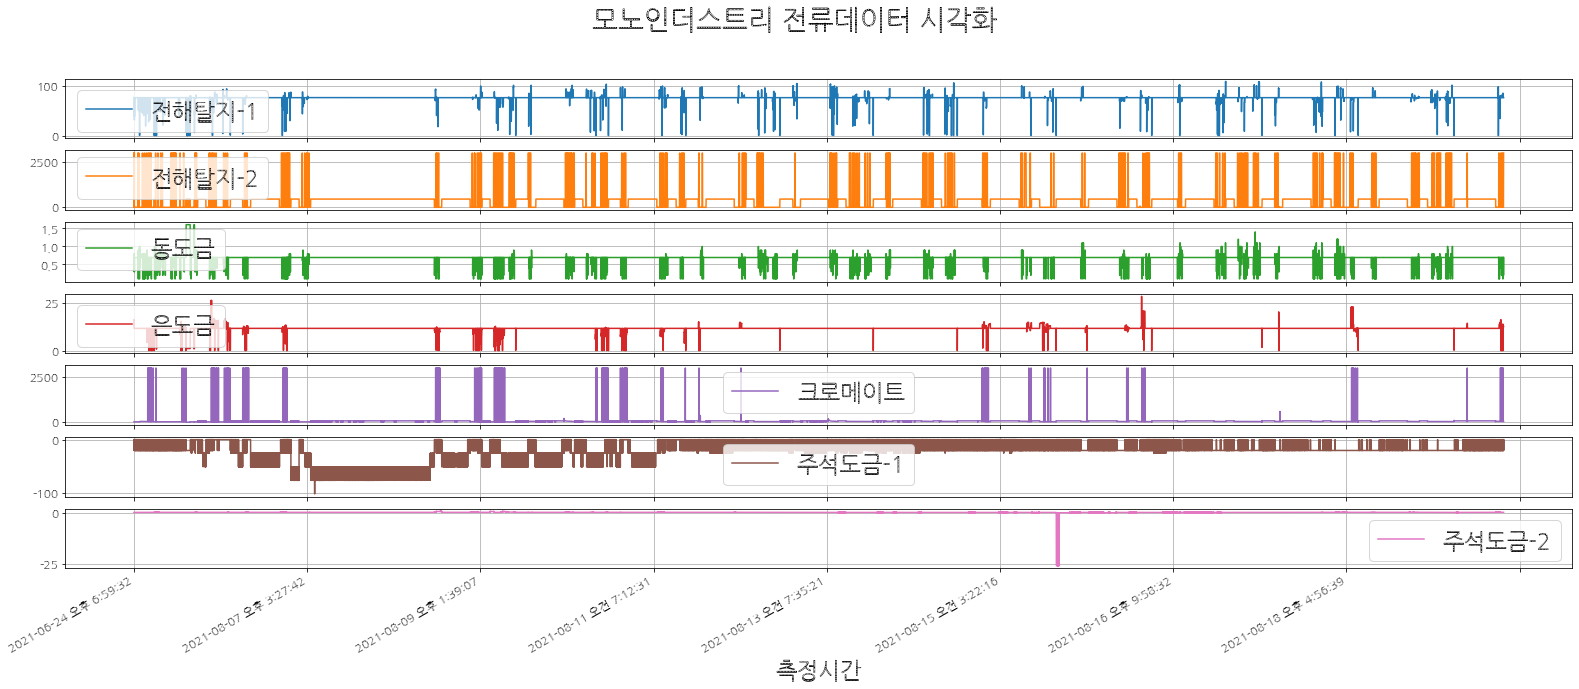

In [41]:
elec_df.plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전류데이터 시각화')
plt.show()

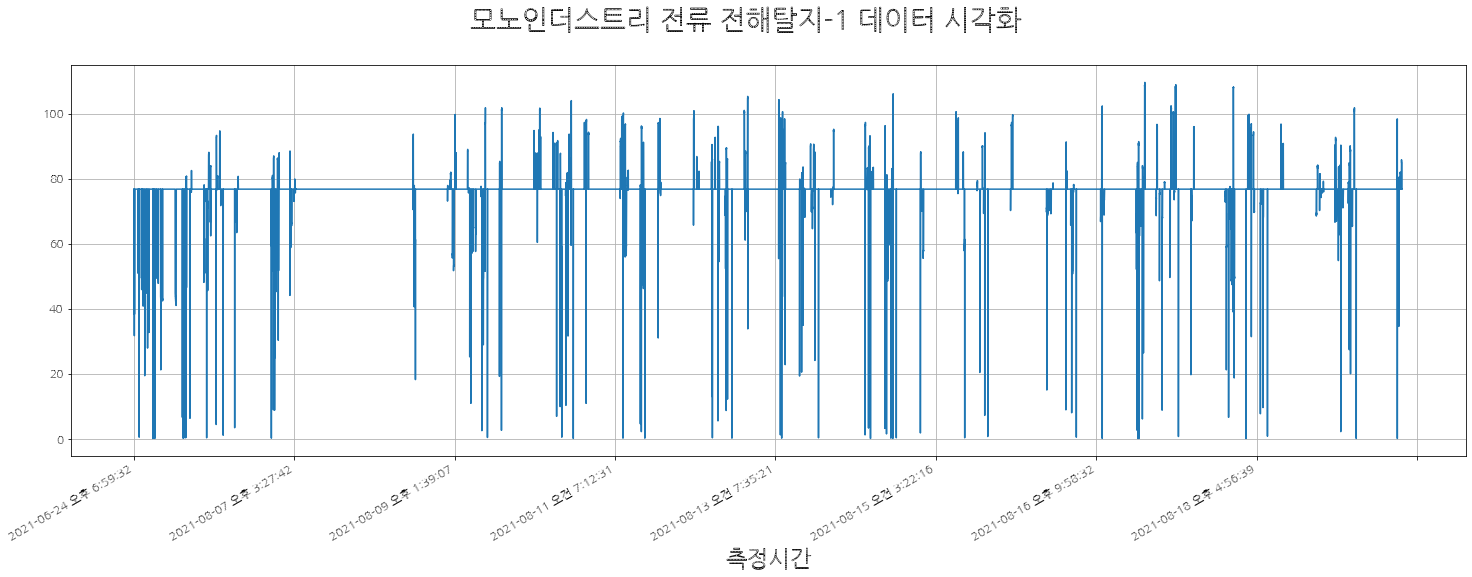

In [42]:
elec_df['전해탈지-1'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 전해탈지-1 데이터 시각화')
plt.show()

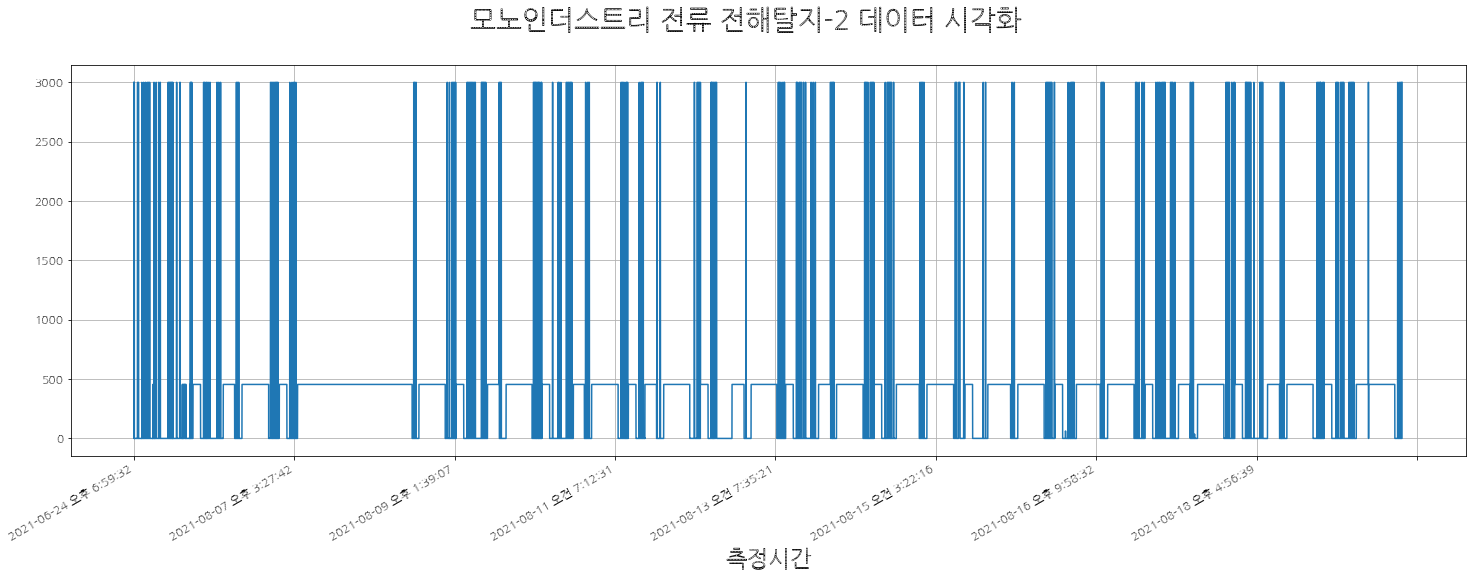

In [43]:
elec_df['전해탈지-2'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 전해탈지-2 데이터 시각화')
plt.show()

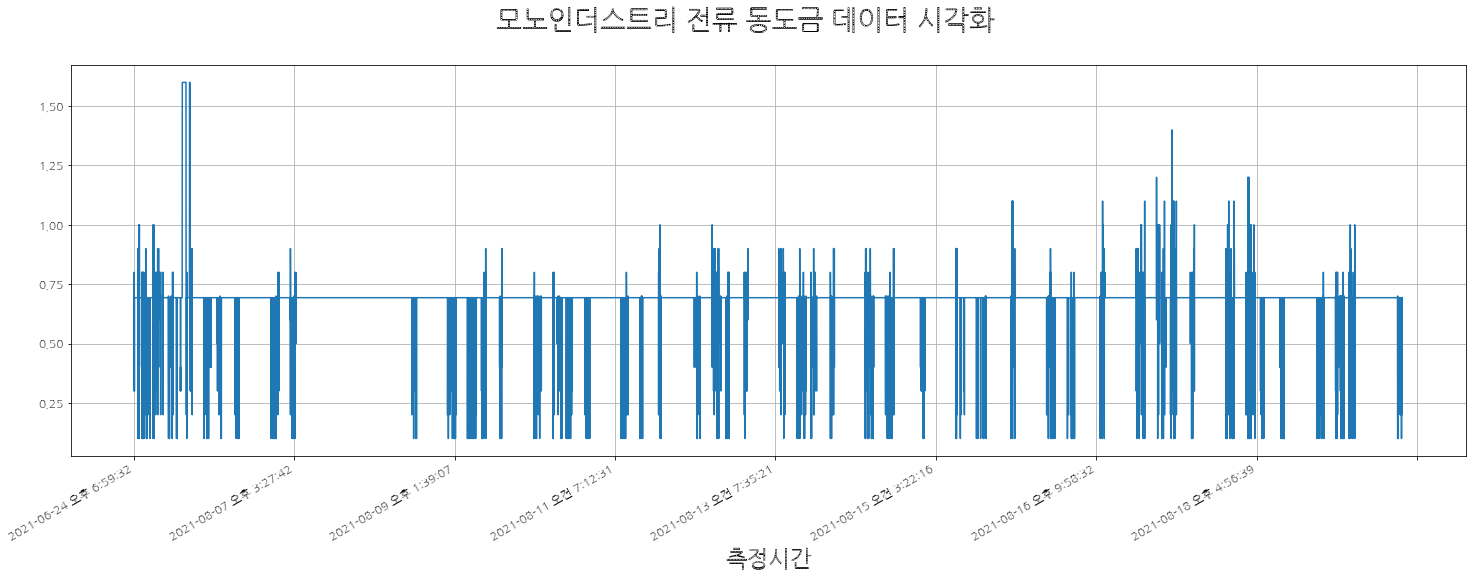

In [44]:
elec_df['동도금'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 동도금 데이터 시각화')
plt.show()

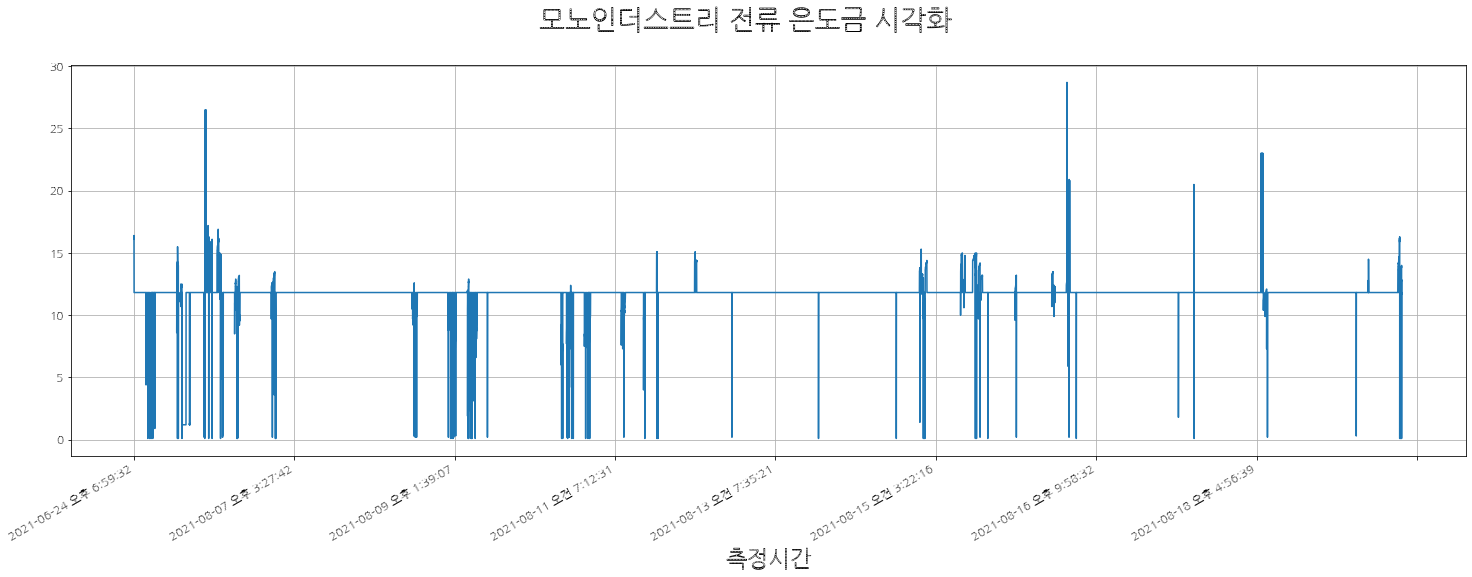

In [45]:
elec_df['은도금'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 은도금 시각화')
plt.show()

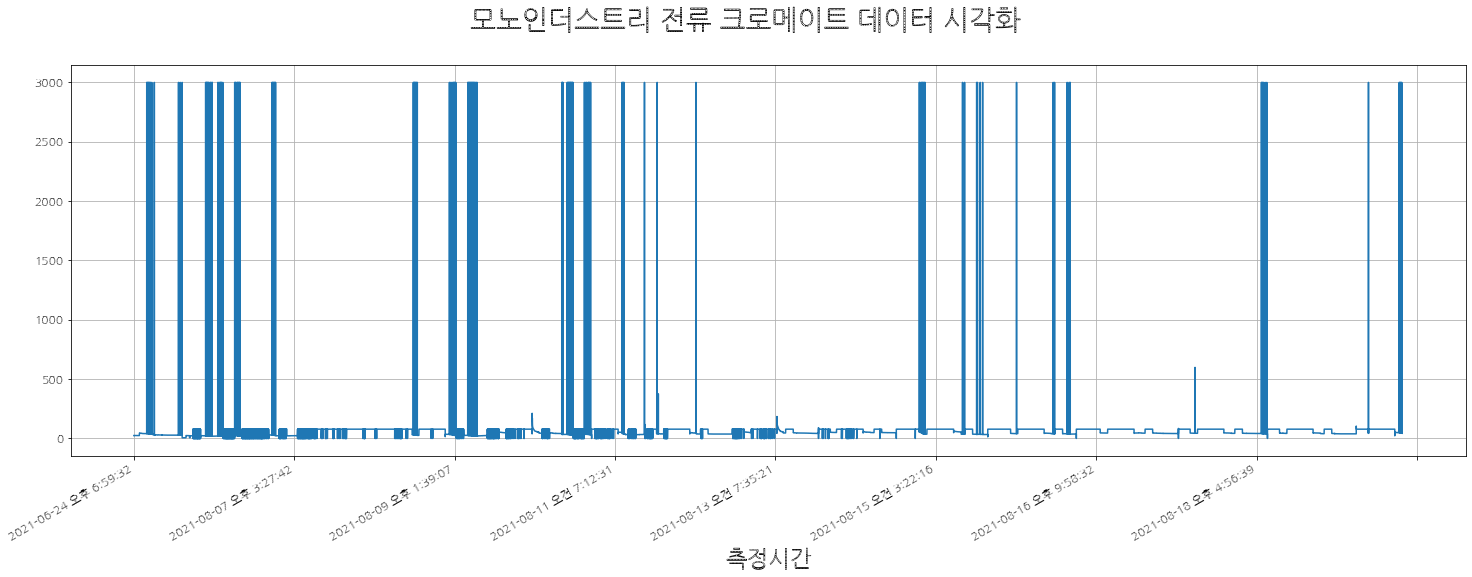

In [46]:
elec_df['크로메이트'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 크로메이트 데이터 시각화')
plt.show()

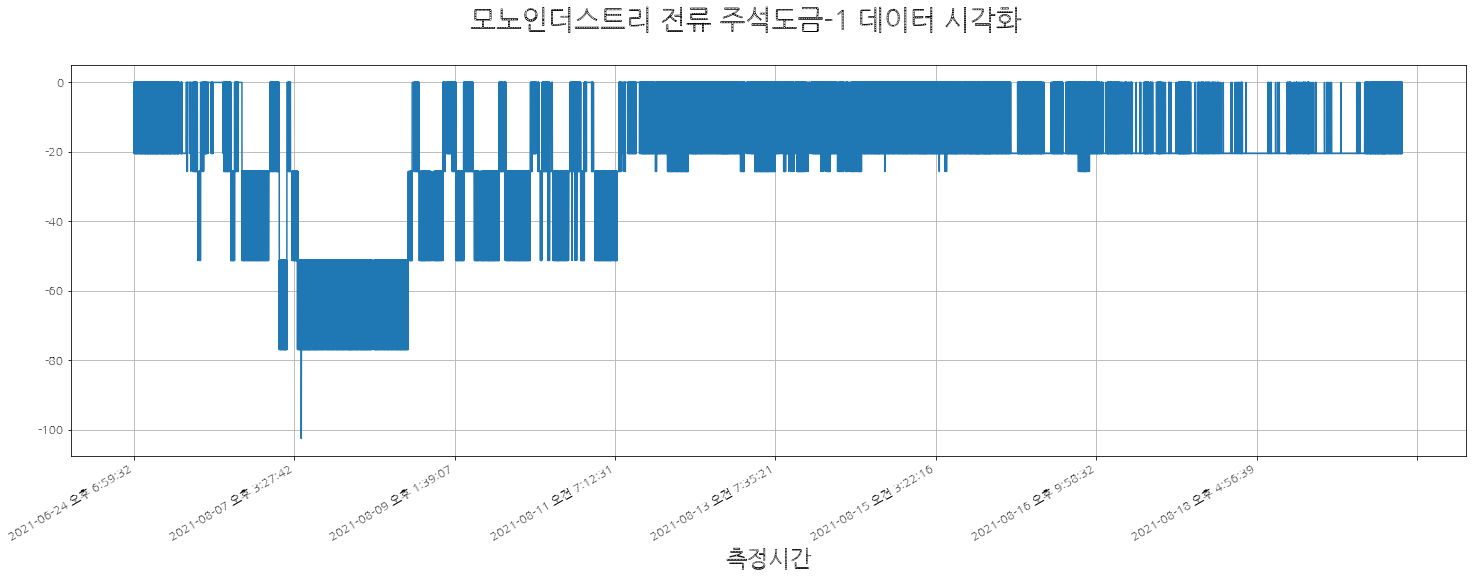

In [47]:
elec_df['주석도금-1'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 주석도금-1 데이터 시각화')
plt.show()

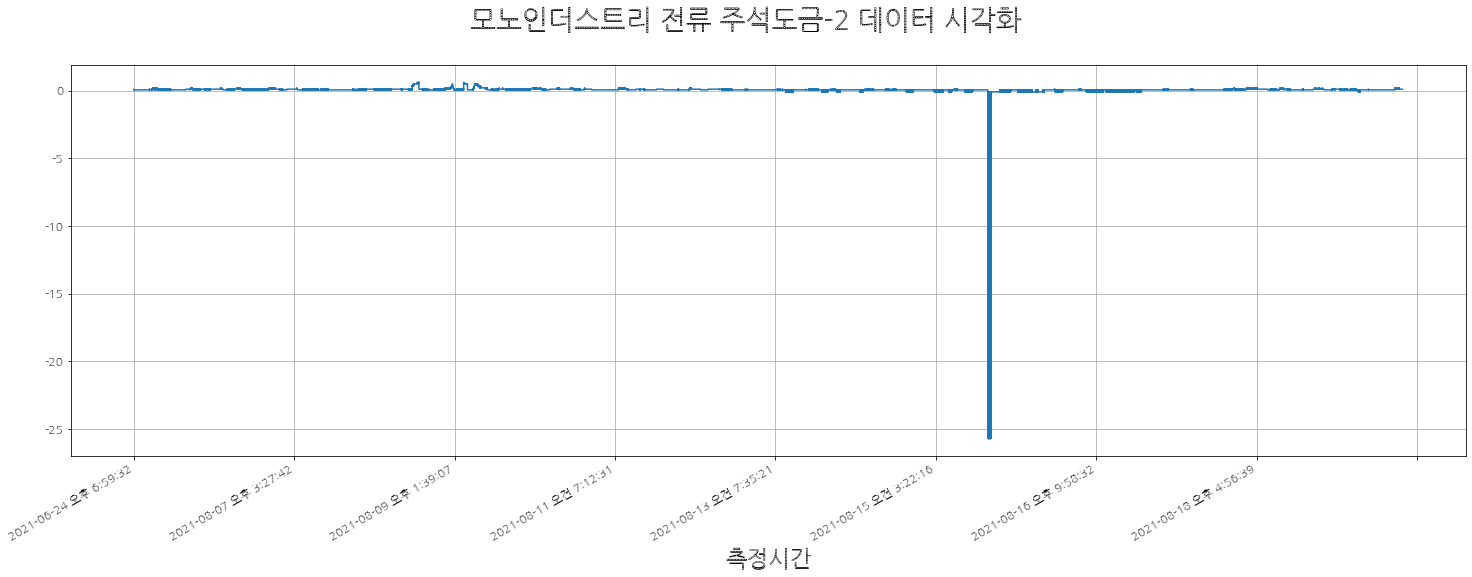

In [48]:
elec_df['주석도금-2'].plot(subplots=True, grid=True, 
           figsize=(25, 8), fontsize=12,
           title='모노인더스트리 전류 주석도금-2 데이터 시각화')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

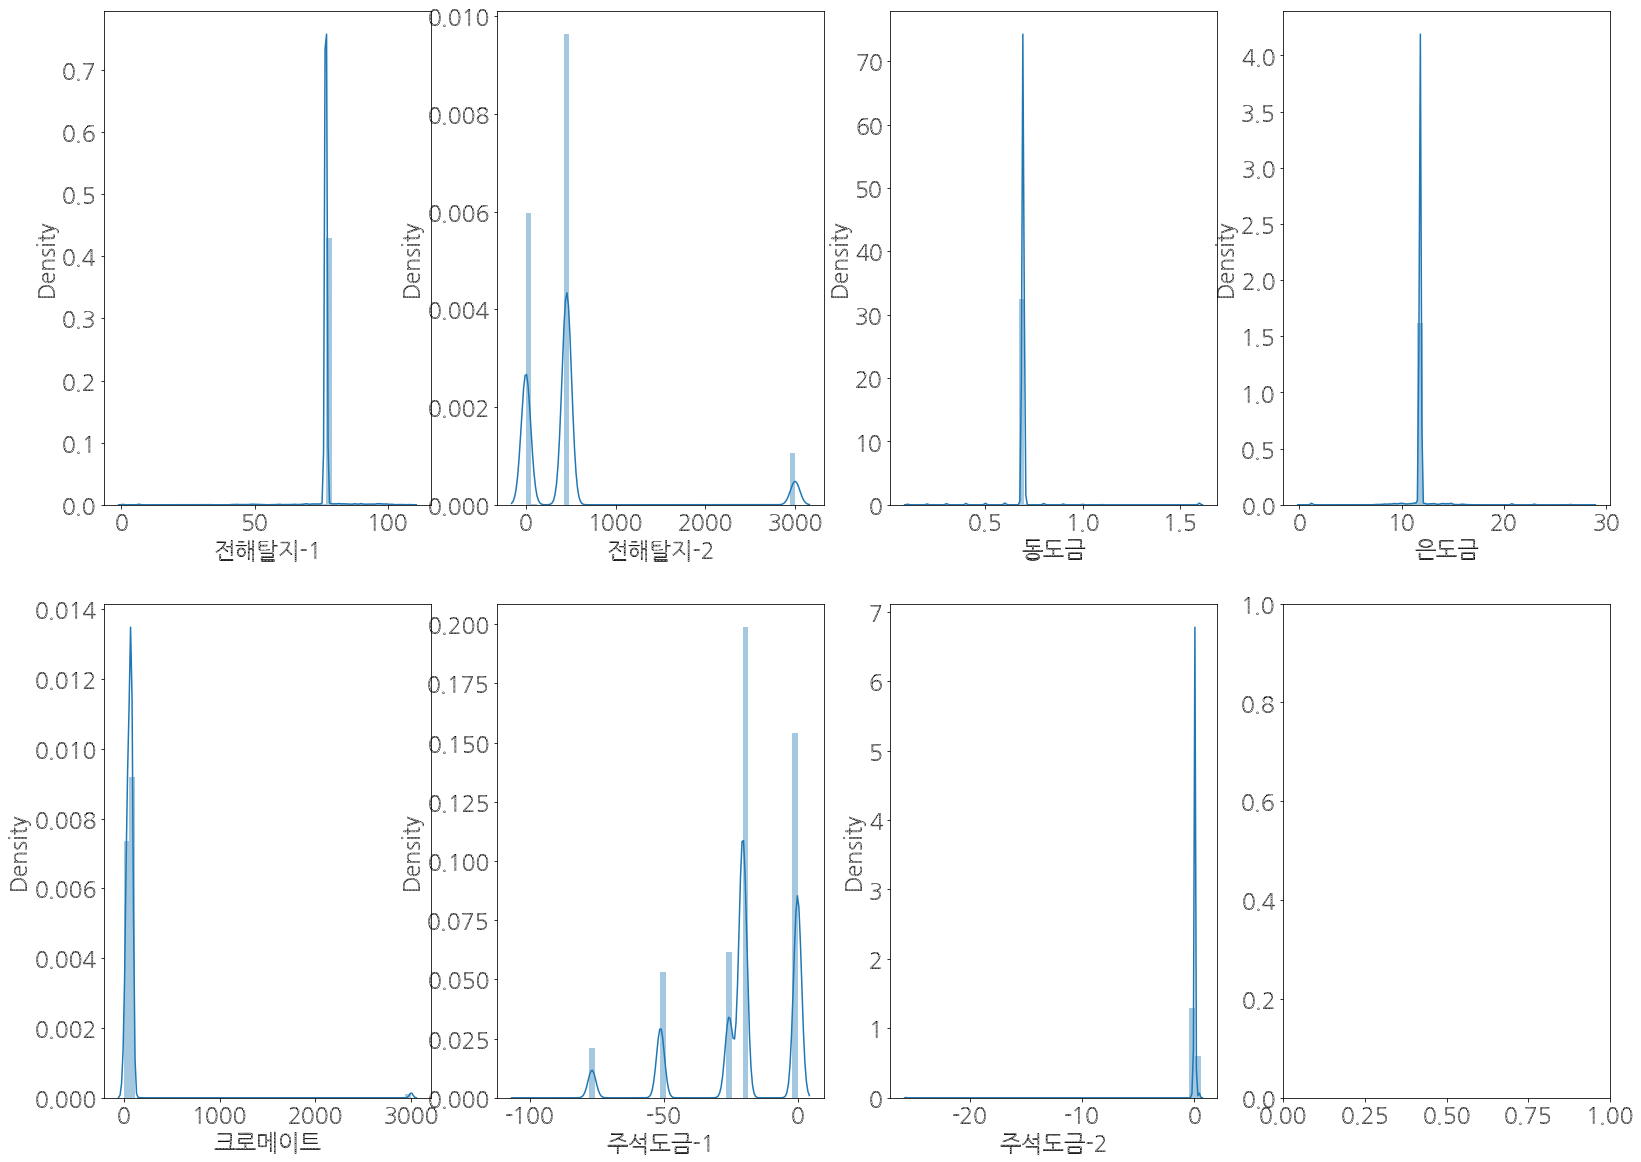

In [49]:
# 시각화 여러개 나오게 하기
figure, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2,4)
figure.set_size_inches(27,20)
sns.distplot(elec_df['전해탈지-1'], ax=ax1)
sns.distplot(elec_df['전해탈지-2'], ax=ax2)
sns.distplot(elec_df['동도금'], ax=ax3)
sns.distplot(elec_df['은도금'], ax=ax4)
sns.distplot(elec_df['크로메이트'], ax=ax5)
sns.distplot(elec_df['주석도금-1'], ax=ax6)
sns.distplot(elec_df['주석도금-2'], ax=ax7)

### 전류 데이터 통계 및 상관관계 히트맵


In [50]:
elec_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전해탈지-1,395348.0,76.770662,5.065990,0.1,76.770662,76.770662,76.770662,109.6
전해탈지-2,395348.0,455.359056,698.819659,0.1,0.700000,455.359056,455.359056,3000.0
동도금,395348.0,0.693071,0.068057,0.1,0.693071,0.693071,0.693071,1.6
은도금,395348.0,11.822640,1.132806,0.1,11.822640,11.822640,11.822640,28.7
크로메이트,395348.0,78.283530,236.401791,-0.1,40.800000,78.283530,78.283530,3000.1
주석도금-1,395348.0,-20.537155,19.379664,-102.5,-25.700000,-20.537155,-0.100000,-0.1
주석도금-2,395348.0,0.048050,0.603205,-25.7,0.048050,0.048050,0.100000,0.6


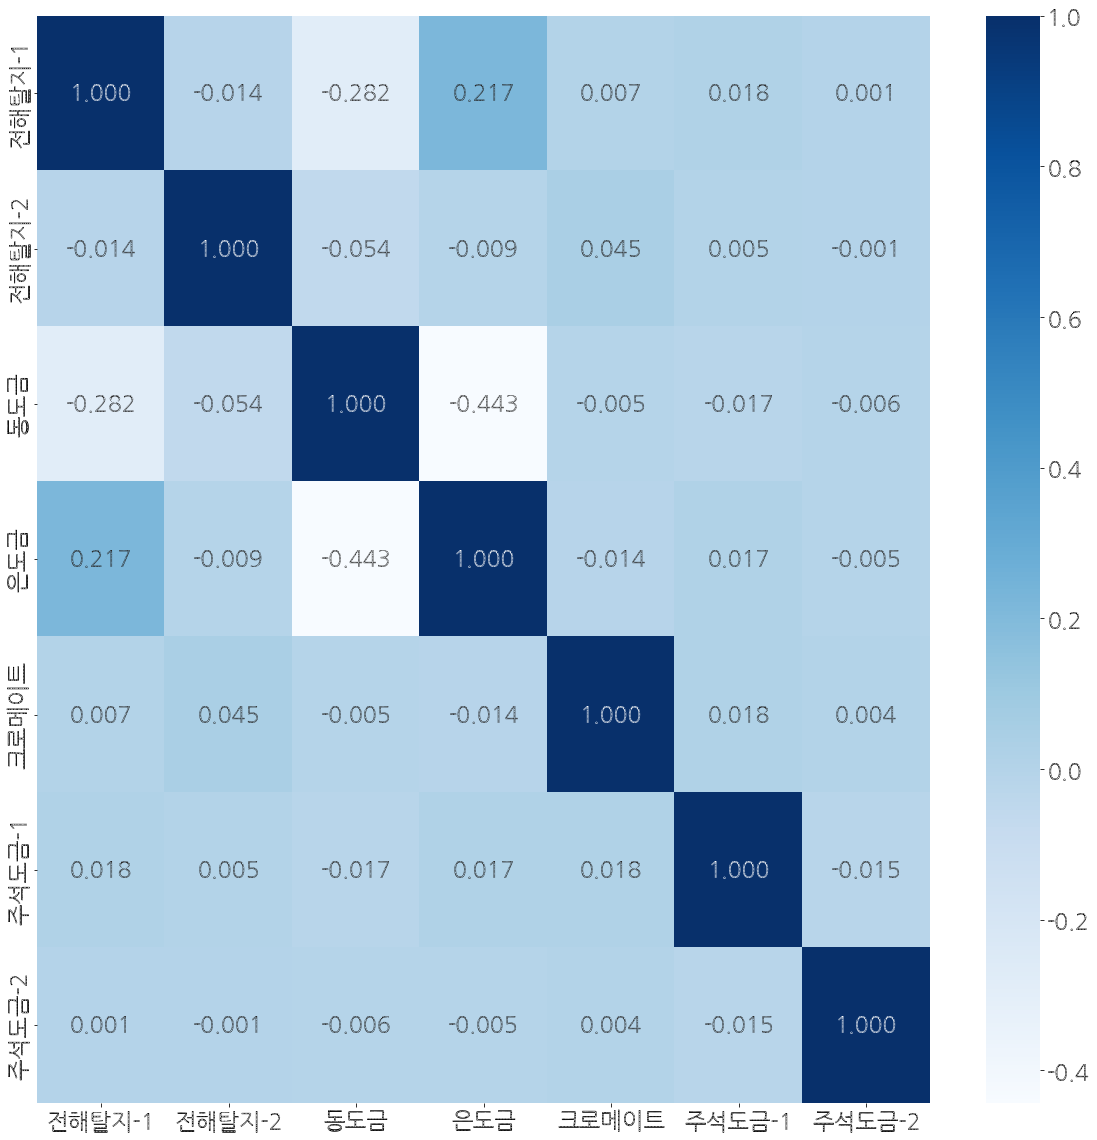

In [51]:
sns.heatmap(data = elec_df.corr(), annot=True, fmt = '.3f', linewidths=0, cmap='Blues')

### 모노_전압.xlsx

- 주석도금-1, 주석도금-2 데이터 없음

In [52]:
# 전압
v_df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, '모노_전압.xlsx'),
                   header=2,
                   index_col='측정시간'
                   ) # 몇번째 행부터 데이터를 읽을 것인지

In [53]:
# 0값 결측치로 변경
v_df = v_df.replace(0,np.nan)
v_df

,IDX,전해탈지-1,전해탈지-2,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2
측정시간,,,,,,,,,
2021-08-07 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08 00:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-11 00:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-12 00:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-16 00:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-20 오전 9:59:47,395733,NaN,6.0,1.3,NaN,1.2,5.9,NaN,NaN
2021-08-20 오전 9:59:50,395734,NaN,6.0,1.3,NaN,1.2,5.9,NaN,NaN
2021-08-20 오전 9:59:53,395735,NaN,6.0,1.3,NaN,1.2,5.9,NaN,NaN


In [54]:
# 결측값 평균으로 대치
v_df = v_df.fillna(v_df.mean())
v_df

,IDX,전해탈지-1,전해탈지-2,동도금,은스트라이크,은도금,크로메이트,주석도금-1,주석도금-2
측정시간,,,,,,,,,
2021-08-07 00:00:00,1,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466,NaN,NaN
2021-08-08 00:00:00,2,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466,NaN,NaN
2021-08-11 00:00:00,3,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466,NaN,NaN
2021-08-12 00:00:00,4,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466,NaN,NaN
2021-08-16 00:00:00,5,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-20 오전 9:59:47,395733,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000,NaN,NaN
2021-08-20 오전 9:59:50,395734,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000,NaN,NaN
2021-08-20 오전 9:59:53,395735,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000,NaN,NaN


In [55]:
volt_df_col = ['전해탈지-1','전해탈지-2','동도금','은스트라이크','은도금','크로메이트']
volt_df= v_df[volt_df_col]
volt_df

,전해탈지-1,전해탈지-2,동도금,은스트라이크,은도금,크로메이트
측정시간,,,,,,
2021-08-07 00:00:00,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466
2021-08-08 00:00:00,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466
2021-08-11 00:00:00,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466
2021-08-12 00:00:00,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466
2021-08-16 00:00:00,5.077088,12.810262,1.472898,0.779359,2.995226,5.913466
...,...,...,...,...,...,...
2021-08-20 오전 9:59:47,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000
2021-08-20 오전 9:59:50,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000
2021-08-20 오전 9:59:53,5.077088,6.000000,1.300000,0.779359,1.200000,5.900000


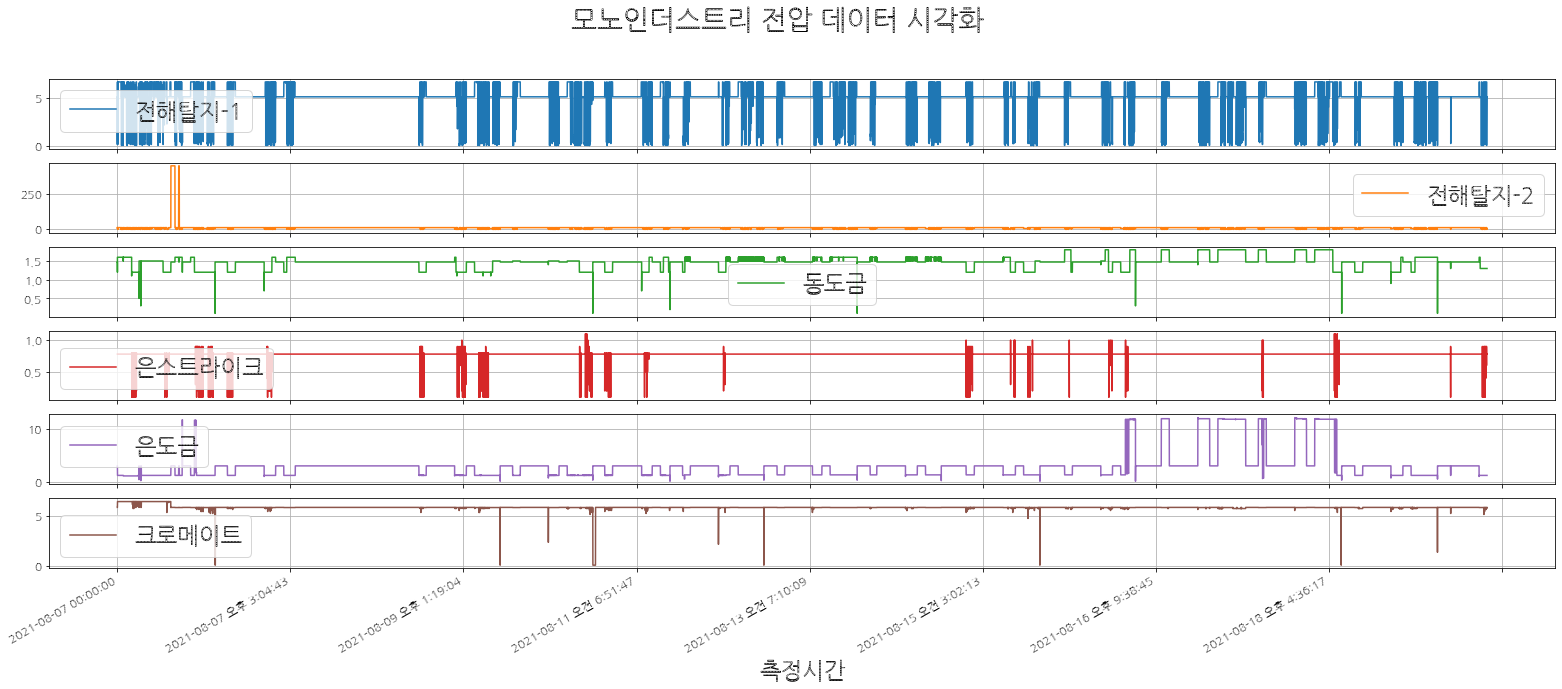

In [56]:
volt_df.plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 데이터 시각화')
plt.show()

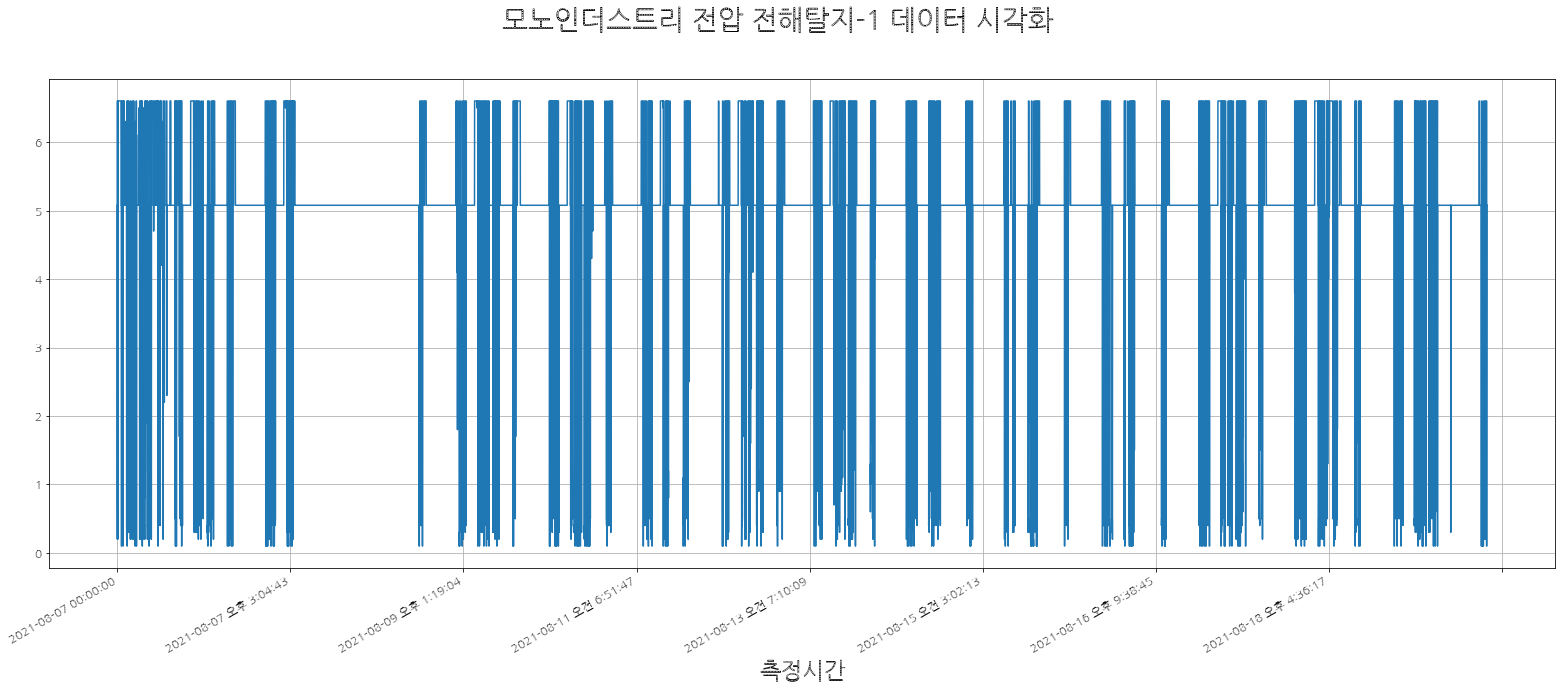

In [57]:
volt_df['전해탈지-1'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 전해탈지-1 데이터 시각화')
plt.show()

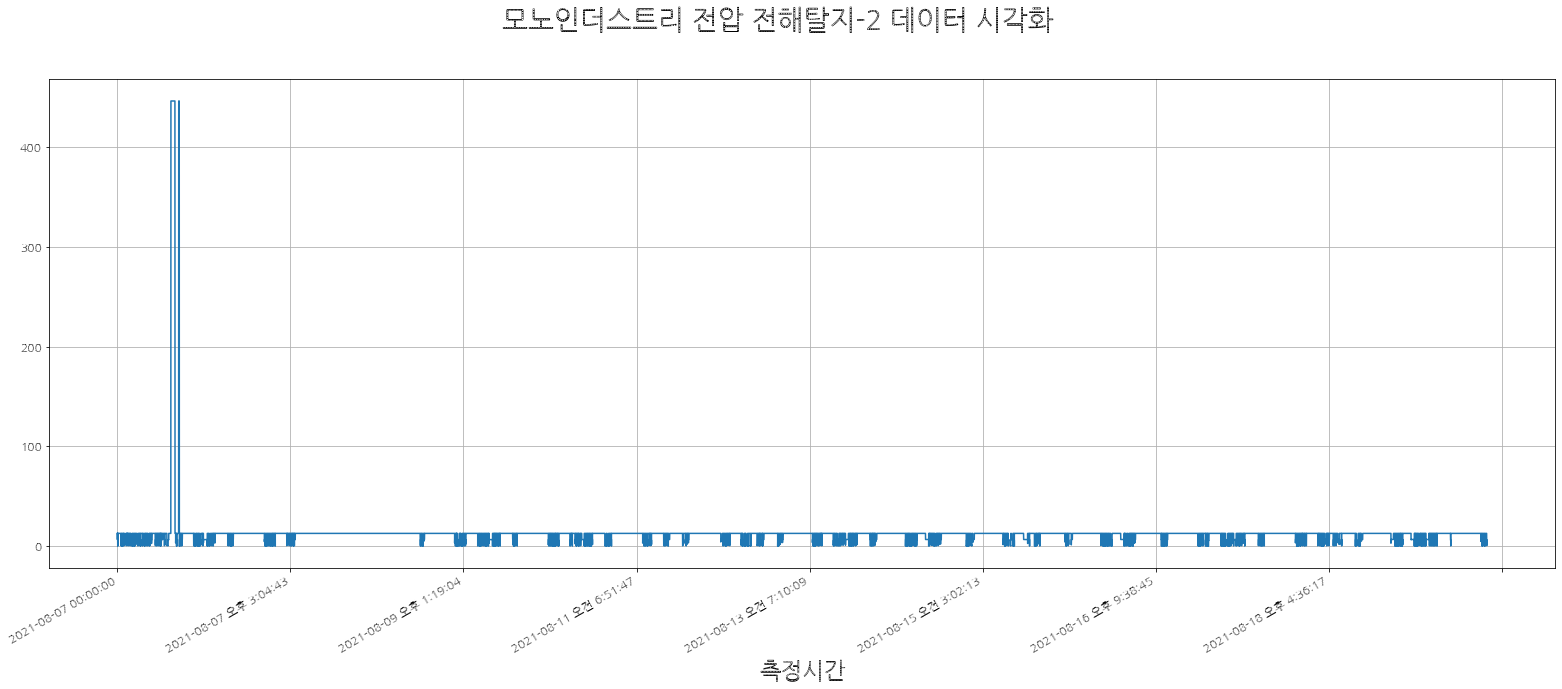

In [58]:
volt_df['전해탈지-2'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 전해탈지-2 데이터 시각화')
plt.show()

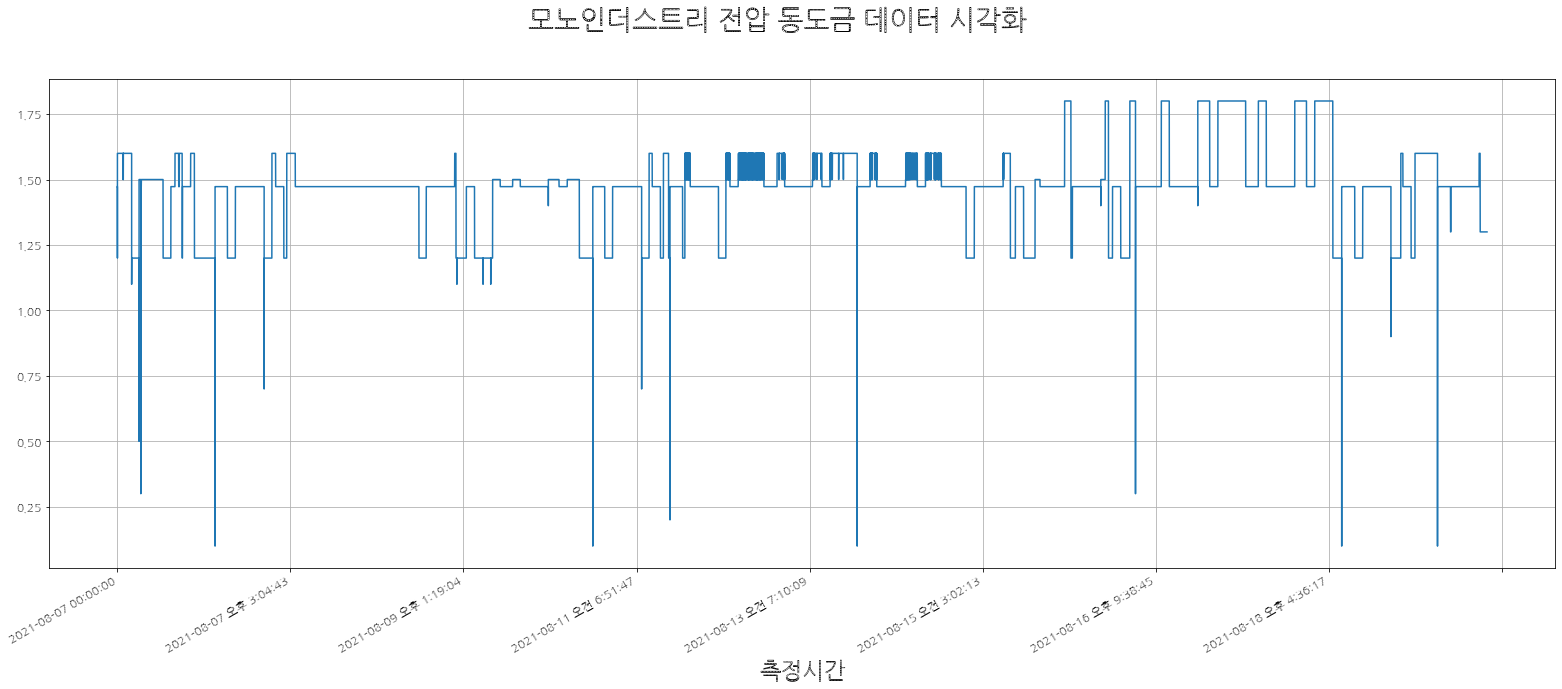

In [59]:
volt_df['동도금'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 동도금 데이터 시각화')
plt.show()

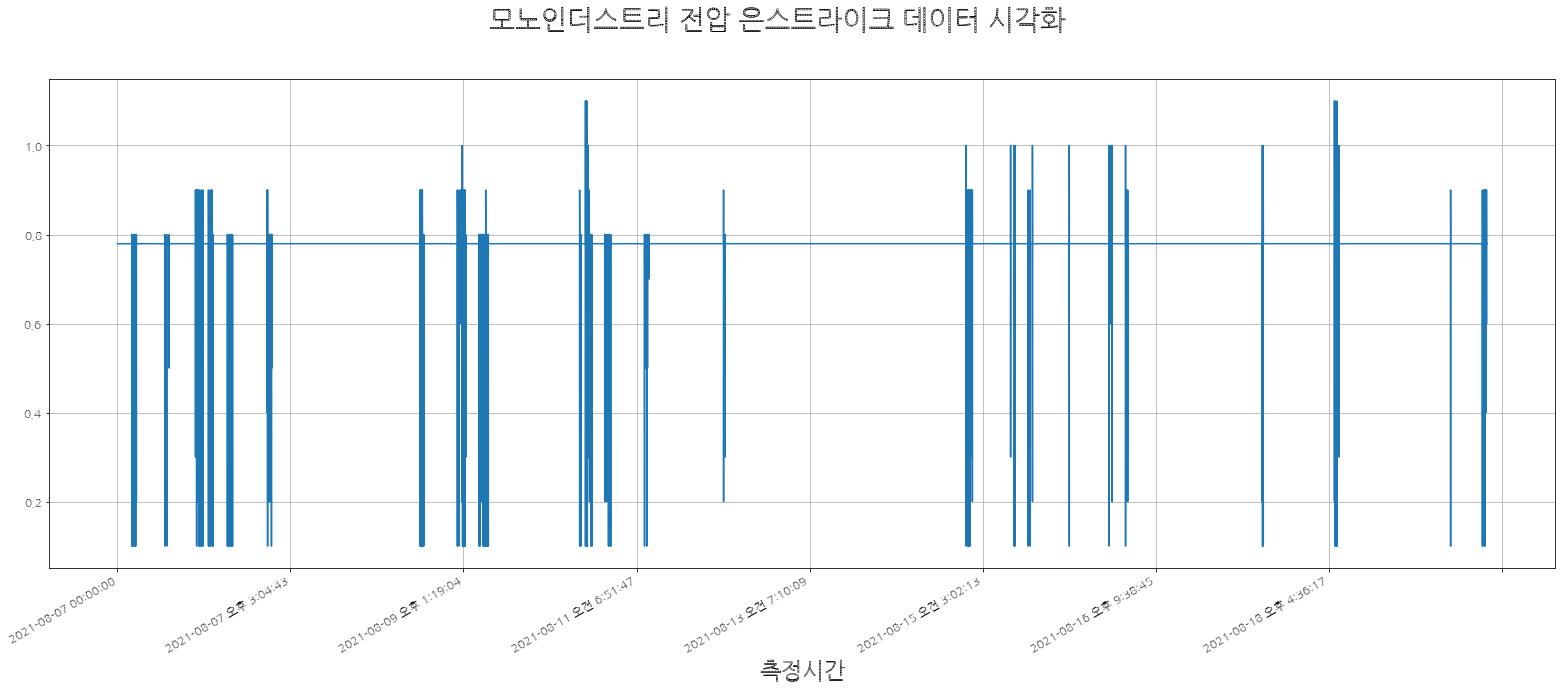

In [60]:
volt_df['은스트라이크'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 은스트라이크 데이터 시각화')
plt.show()

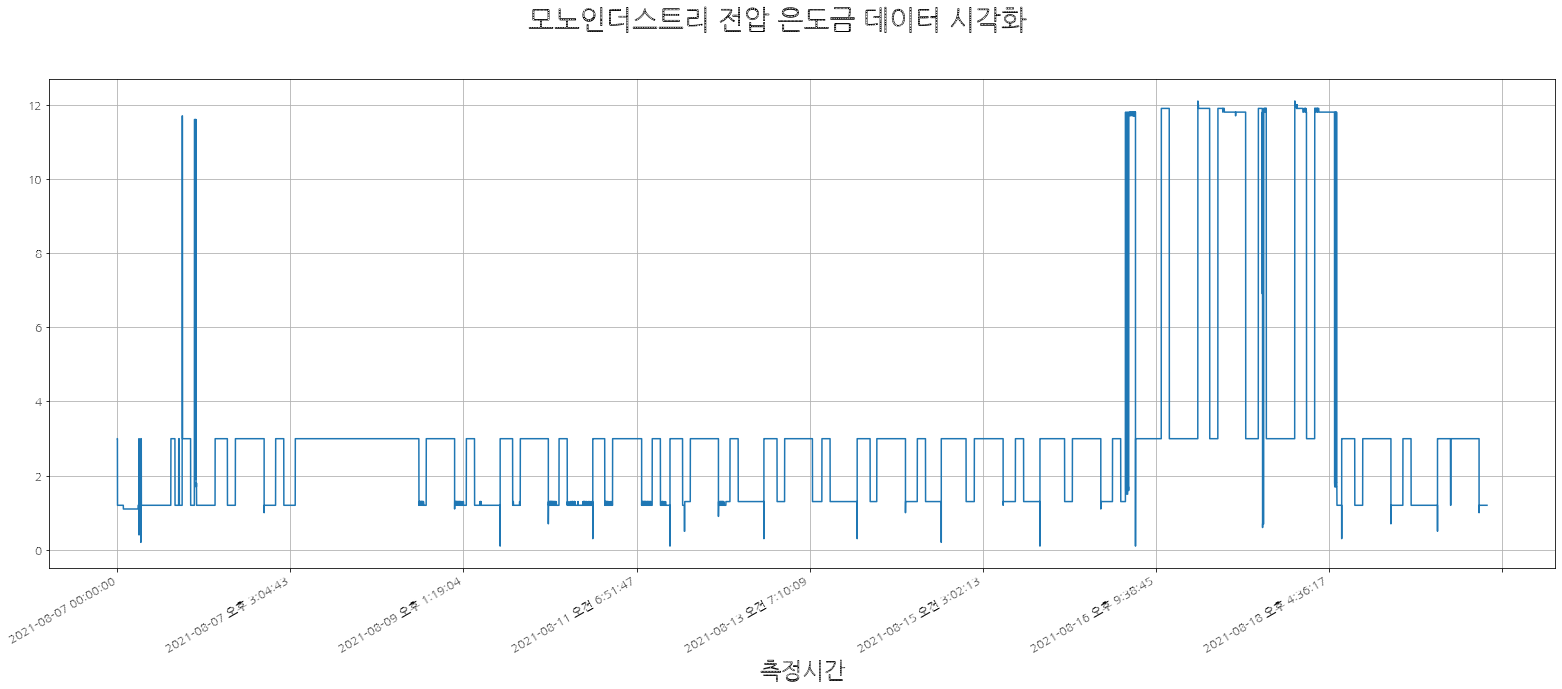

In [61]:
volt_df['은도금'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 은도금 데이터 시각화')
plt.show()

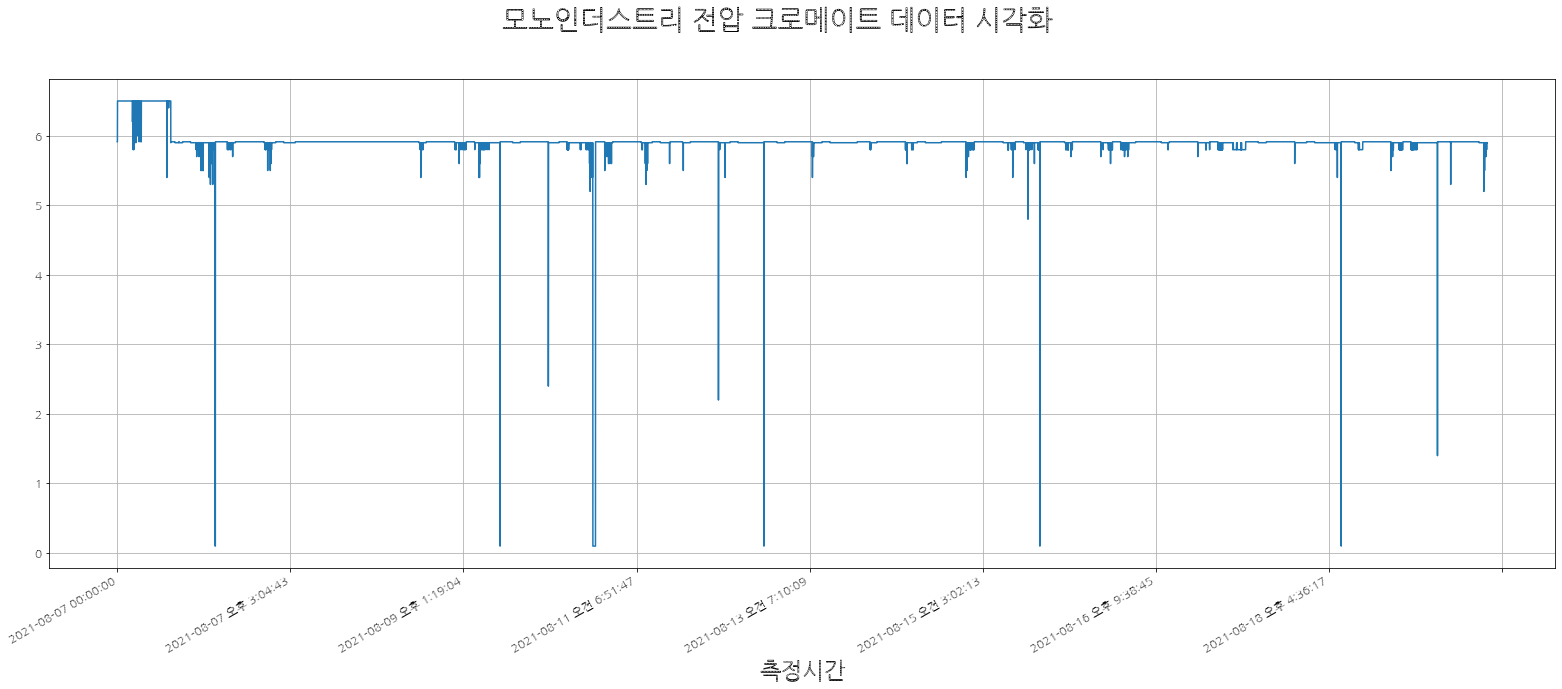

In [62]:
volt_df['크로메이트'].plot(subplots=True, grid=True, 
           figsize=(27, 10), fontsize=12,
           title='모노인더스트리 전압 크로메이트 데이터 시각화')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

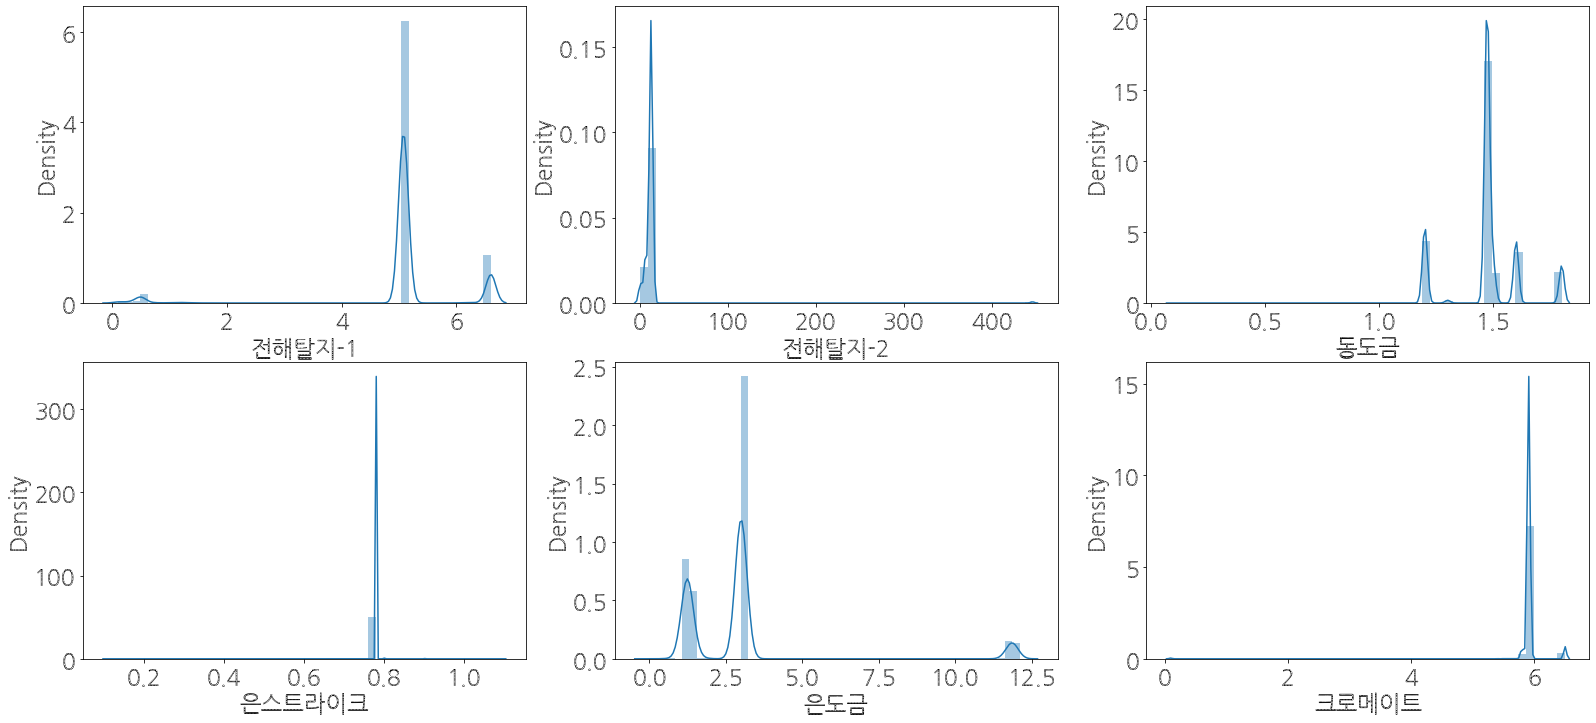

In [63]:
# 시각화 여러개 나오게 하기
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3)
figure.set_size_inches(27,12)
sns.distplot(volt_df['전해탈지-1'], ax=ax1)
sns.distplot(volt_df['전해탈지-2'], ax=ax2)
sns.distplot(volt_df['동도금'], ax=ax3)
sns.distplot(volt_df['은스트라이크'], ax=ax4)
sns.distplot(volt_df['은도금'], ax=ax5)
sns.distplot(volt_df['크로메이트'], ax=ax6)

### 전압 데이터 통계 및 상관관계 히트맵

In [64]:
volt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전해탈지-1,395737.0,5.077088,1.136216,0.1,5.077088,5.077088,5.077088,6.6
전해탈지-2,395737.0,12.810262,25.693107,0.1,12.810262,12.810262,12.810262,446.0
동도금,395737.0,1.472898,0.145449,0.1,1.472898,1.472898,1.500000,1.8
은스트라이크,395737.0,0.779359,0.015021,0.1,0.779359,0.779359,0.779359,1.1
은도금,395737.0,2.995226,2.554471,0.1,1.300000,2.995226,2.995226,12.1
크로메이트,395737.0,5.913466,0.300506,0.1,5.900000,5.913466,5.913466,6.5


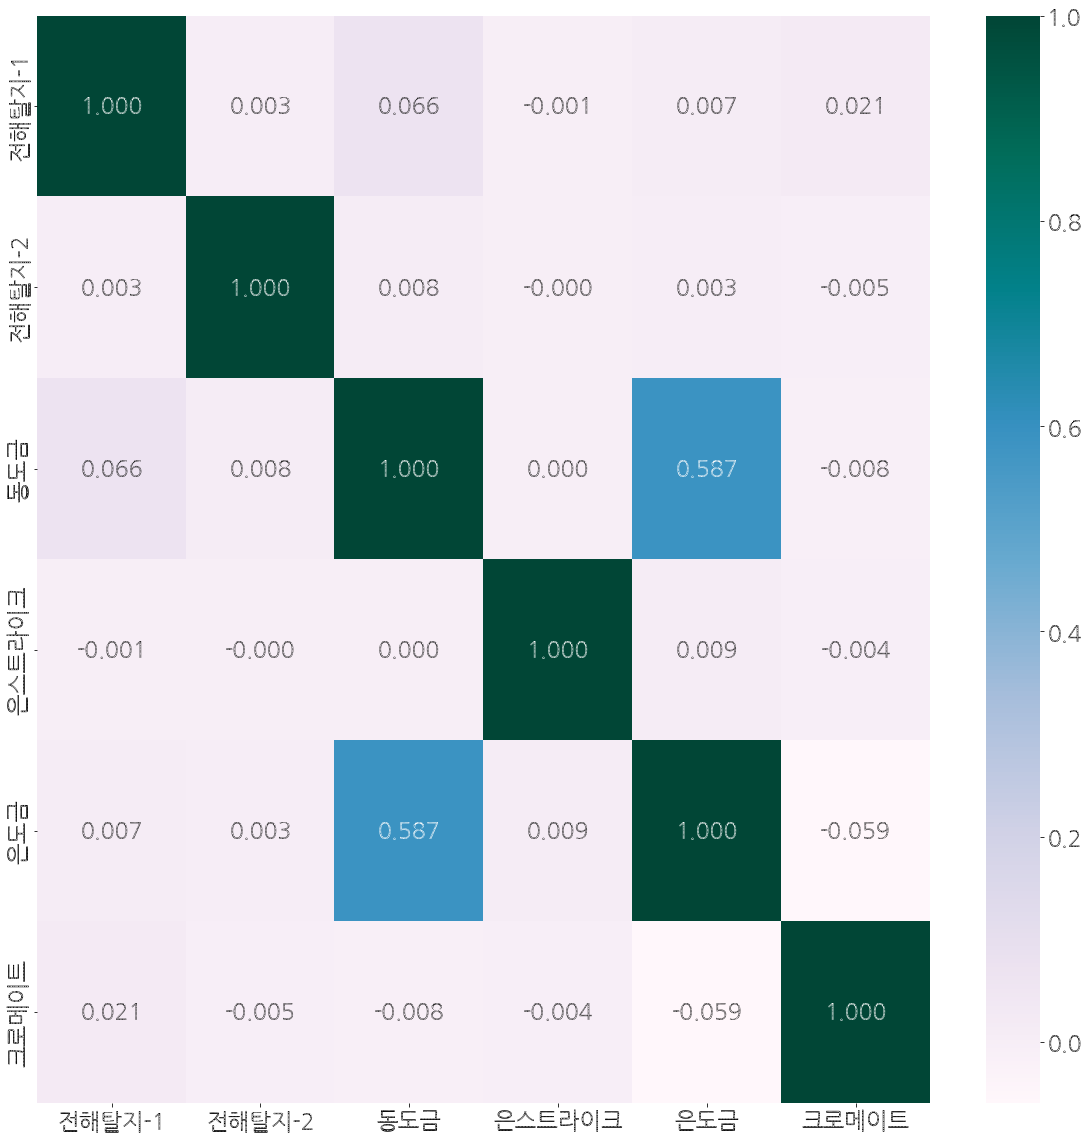

In [65]:
sns.heatmap(data = volt_df.corr(), annot=True, fmt = '.3f', linewidths=0, cmap='PuBuGn')